# Capstone proposal by PAUL MELLET

# Data-driven avalanche hazard prediction

## 1) The problem

### a) Context

In Switzerland, one of the missions of the SLF is to build a daily avalanche forecast for Switzerland. SLF stands for *Institut für Schnee-und Lawinenforschung* in German which means *Institute for Snow and Avalanche research*. The SLF is part of the WSL, *Eidgenössische Forschungsanstalt für Wald, Schnee und Landschaft* or the *Swiss Federal Institute for Forest, Snow and Landscape Research*.

This forecast is published once, at 5 pm, or twice per day, once at 8 am and once at 5 pm [[1]](#ref1). Generally, the first avalanche forecast is published from the first significant snowfall, around middle or end of november, until around end of May or middle of June. Normally, there isn't any forecast during summer unless significant snowfalls occur again. [[1]](#ref1)

The users and usages of this forecast can be various. For instance, by taking notes of it and for security measures, the swiss communes can temporarily close roads or schools in extreme cases, the ski resorts some of their pistes (if not the entire resort) or the amateurs of mountain sports, mountain professionals for their personal pratice. [[2]](#ref2)

### b) How to read and interpret an avalanche forecast

The avalanches can be triggered by human overloading on the snow cover (e.g a skier) or spontaneously, which we call spontaneous or natural avalanches. We won't go into too much details, but it is important for us to remind that there are 5 typical situations that can create avalanches (if needed, one can find more complete informations here [[3]](#ref3)): 

* new-snow: due to current or recent snowfalls creating an overloading on the snowpack

* wind slabs: due to the wind bringing additional accumulations of snow on the current zone

* old-snow: due to persistent weak layers in the snowpack that can break creating the start of snow slabs

* wet-snow: due to a certain amount of liquid water in the snowpack, they are mainly spontaneous

* gliding avalanches: the entire snowpack glides on the ground, due to low friction between the snowpack and the ground, they are mainly spontaneous

The SLF also classifies these situations into two categories [[4]](#ref4):

* "dry-snow" problem: takes into account the new-snow, wind slabs and old-snow situations

* "wet-snow" problem: takes the wet-snow and gliding avalanches situations. 

The SLF uses the five-level European avalanche danger scale to denote the avalanche danger. When the danger level is 1, it is considered as *"low"*, 2 is used for *"moderate"*, 3 for *"considerable"*, 4 for *"high"* and 5 for *"extremely high"*. Since december 2022 [[5]](#ref5), the danger level from 2 can also be followed by a -, =, or + sign to track more accurately the danger level tendency (2- is less dangerous than 2= which is less dangerous than 2+). 

The danger level is in fact an index of the risk of avalanches. It follows the formula:

$\text{risk} = \text{consequences}\cdot\text{probability of occurrence}$

The greater the danger level, the larger the avalanches may be, the more likely they are to occur in several zones and the higher the probability of having avalanches is [[6]](#ref6).

While the interpretation of the avalanche forecast is accessible to all (we will briefly explain how one can read it just after), its establishment and the study of avalanche hazard is really complex. The searchers at SLF use a large variety of data coming from different parts of the country and whose contributors can be either SLF observers, SLF partners or mountains enthusiasts. To mention only a few ones: measurements made by SLF stations (quantity of snow or snowfall, wind speed, wind direction, temperatures, ...), observations (signals of avalanches) reported by mountain amateurs while being on the terrain, weather forecast, or snow profiles study and stability tests established by SLF observers or partners. [[7]](#ref7) Snow profiles involve cutting through the entire snowpack down to the ground to examine its layers, the cohesion between them, and the snowpack’s resistance to additional loads. [[8]](#ref8)

We suggest to have a look on an example of an avalanche forecast published at 17:00 the 15th of March 2025. You can find the whole forecast here [[9]](#ref9).

We will only focus on parts of it to explain the important points. 

The first thing that the avalanche forecast presents is a map of Switzerland:

<img src="../pictures_maps/avalanche_danger1.png" width="600" height="300">

This map is separated in regions painted in different colors according to the current highest danger degree. Green is used when the danger is 1 (low), yellow when it is 2 (moderate) and orange when it is 3 (considerable). The avalanche danger degree can be also 4 (high), colored in red, and 5 (extremely high) colored with red and black grids. The regions in white are those where the snow cover isn't significant enough to be considered assuming a real avalanche danger. 

The avalanche forecast then shows a more detailed description for every region of the avalanche danger. Let's have a look at the region D of this forecast. 

<img src="../pictures_maps/avalanche_danger2.png" width="600" height="300">

We can see different things:

- separated regions can belong to the same alert zone. This is because the SLF considers that the conditions in those regions are equivalent and the dangers and the danger levels are the same, even if they are not connected. In our case, the region D includes a part of the south of Valais and a part of the Grisons.

- as we said previously, the degree, which is an integer from 1 to 5, can be followed by a sign - or +  which indicates if the danger tendency is upward or downward. When no sign is added, it is the same as if the = sign was added.

- Most of the time, the SLF defines an altitude from which the avalanche danger degree is effective. For locations below this altitude, there is a rule of thumb that says that the danger degree can be interpreted as equal to the one announced minus 1 [[10]](#ref10). In our case, the danger is 3- above 2200m, 2- below. Also, *"If this information is not given, the indicated danger level applies to all aspects and altitude zone"* [[10]](#ref10).

- the aspect rose defines the orientations (in black) for which the danger degree is effective. The locations that are not concerned by these orientations (in white), the danger degree is equal to the one announced minus 1. In our case, for the orientations from west to east included passing through the north, the danger is 3- and 2- for south, south-east and south-west oriented zones. 

- the avalanche forecast defines all the types of danger that are current in this region. There can be two different dangers with different degrees for a single alert region. This often happens during spring. We won't explain here the different types of avalanches but we can still keep in mind that during winter, most of the avalanches are either caused by wind slab, dry-snow avalanches or old-snow avalanches, while in spring, due to the temperature warming, the danger can be also due to wet snow. The overall avalanche danger degree (the one used for coloring the region) is always the highest one among all the possible avalanche dangers.

- for every type of danger, a text explains it more in details.

A maybe obvious but important thing to keep in mind is that the degree, if the degree is followed by a - or + sign, the altitude limits and the orientations are only indicatives. The danger doesn't strictly shift from 3 to 2 exactly below the altitude of 2700m for example.

### c) Our goal

As we said, the avalanche forecast and the intensity of the danger degree rely, among other things, on meteorological data recorded by the SLF stations. In this project, we aim to train supervised machine learning models with historical daily weather data recorded by these stations and the historical daily danger degrees that were effective at the location of these stations.

Throughout this project, we will first have a first contact with the variables that the SLF uses for evaluating the avalanche danger risk. Indeed, apart from the classic meteorological data one might expect the institute to use (such as temperature, wind, quantity of snowfall etc.) , we will see that there are some more "exotic" variables such as the *Skier penetration depth* that the SLF takes into account.

Doing this will allow us to predict the avalanche danger degree, which again takes value in 1, 2, 3, 4, 5 possibly followed by a - or + sign, with only data measured and provided by the SLF. 

More generally, this project will tell us wether the avalanche forecast can only be build with those data (without empirical knowledges, experiments or observations of scientists on the terrain) or there are great chances that it will be in the future. 

## 2) The data

### (a) Clear overview of your data

#### i) Source and context of the dataset

[*EnviDat*](#https://www.envidat.ch/#/) (Environmental Data) is the data portal of the WSL, which includes the SLF. It provides standardized, regulated access to environmental monitoring and research data.

During this project, we will work on the *"Data_weather_snowpack_danger_forecast"* dataset, which can be found here: 

https://www.doi.org/10.16904/envidat.330

*"This data set includes the meteorological variables (resampled 24-hour averages) and the profile variables extracted from the simulated profiles for each of the weather stations of the IMIS network in Switzerland, and, the danger ratings for dry-snow conditions assigned in the Swiss avalanche bulletin to the location of the weather station. This dataset provides daily meteorological variables, profile variables"* [[11]](#ref11) The IMIS network (Intercantonal Measurement and Information System) consists of 189 stations located in various parts of Switzerland, that are either snow stations, wind stations or specialized stations. [[12]](#ref12)


There are a few important things to note:

Firstly, as we will work on this dataset, our Machine Learning project will then only focus on danger levels for dry-snow conditions and not for wet-snow conditions.

Secondly, this dataset was built for a Machine Learning project within a SLF team to predict automatically and data-based the avalanche danger with two different Random Forest Classifiers [[13]](#ref13). If the objective of our project will be similar, our goal will be different in its aim: build our own pipeline and train several machine learning models seen in class and see how they behave on this task.

Finally, the SLF team worked with another data set *Data_RF2_tidy*, also available on https://www.doi.org/10.16904/envidat.330, to build the second Random Forest Classifier in order *"to reduce the uncertainty resulting from using the forecast danger level as target variable, we trained a second classifier (RF 2) that relies on a quality-controlled subset of danger level labels."* [[13]](#ref13) In this project, we plan to only use the first dataset. 


In this project, other tables will help us understand the features stored in the main dataset. The SLF provides the links that allow to extract useful information on the following website:

https://www.slf.ch/en/services-and-products/slf-data-service/

We will use:

- the SLF stations list: https://measurement-data.slf.ch/imis/
- the warning regions and sectors identifiers: https://aws.slf.ch/api/warningregion/#/

Finally, we will use the *"Appendix C: Definition of features for developing RF models"* part of *Pérez-Guillén, C., Techel, F., Hendrick, M., Volpi, M., van Herwijnen, A., Olevski, T., Obozinski, G., Pérez-Cruz, F., and Schweizer, J.: Data-driven automated predictions of the avalanche danger level for dry-snow conditions in Switzerland, Nat. Hazards Earth Syst. Sci., 22, 2031–2056, https://doi.org/10.5194/nhess-22-2031-2022, 2022* [[13]](#ref13). In this subsection, the authors provide two tables that describe variables stored in the dataset. Their names and descriptions can be downloaded as XLSX files that will be very useful for us. 

#### ii) First entries

We first download all the table we need.

In [1]:
# Importing main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Our dataset
data = pd.read_csv("../datasets/data_rf1_forecast.csv")

# Metadata related to stations
stations = pd.read_csv("../datasets/stations.csv")

# Concatenating metadata related to meteorological and profile variables
meta_data_1 = pd.read_excel("../datasets/nhess-22-2031-2022-t05.xlsx") # Meteorological variables
meta_data_2 = pd.read_excel("../datasets/nhess-22-2031-2022-t06.xlsx") # Profile variables
meta_data = pd.concat([meta_data_1, meta_data_2], axis=0)
meta_data.reset_index(drop=True, inplace=True)

Let's have a look on the first entries of our dataset.

In [3]:
data.head()

,Unnamed: 0,datum,station_code,sector_id,warnreg,elevation_station,forecast_initial_date,forecast_end_date,dangerLevel,elevation_th,...,ssi_pwl,sk38_pwl,sn38_pwl,ccl_pwl,ssi_pwl_100,sk38_pwl_100,sn38_pwl_100,ccl_pwl_100,Pen_depth,min_ccl_pen
0,0,1997-11-11,KES2,7113.0,15.0,2700.0,1997-11-11 17:00:00,1997-11-12 17:00:00,1.0,2000.0,...,2.02,1.02,1.92,0.30,2.02,1.02,1.92,0.30,44.028391,0.17
1,1,1997-11-11,SIM2,6113.0,15.0,2400.0,1997-11-11 17:00:00,1997-11-12 17:00:00,2.0,2000.0,...,6.00,6.00,6.00,4.00,6.00,6.00,6.00,4.00,37.271809,0.26
2,2,1997-11-11,DTR2,6113.0,15.0,2100.0,1997-11-11 17:00:00,1997-11-12 17:00:00,2.0,2000.0,...,1.44,0.44,1.37,0.12,1.44,0.44,1.37,0.12,38.369101,0.12
3,3,1997-11-11,MEI2,2221.0,15.0,2200.0,1997-11-11 17:00:00,1997-11-12 17:00:00,1.0,2000.0,...,6.00,6.00,6.00,0.20,6.00,6.00,6.00,0.20,20.400000,4.00
4,4,1997-11-11,SPN2,4232.0,15.0,2600.0,1997-11-11 17:00:00,1997-11-12 17:00:00,2.0,2000.0,...,6.00,6.00,6.00,4.00,6.00,6.00,6.00,4.00,42.332551,0.16


Let's just check the first column `Unnamed: 0` if it's the same as the index.

In [4]:
# Check the number of values that are different between the column and the index
diff_rows = (data["Unnamed: 0"] != data.index).sum()
print("The number of different elements between Unnamed_ 0 and the index is:\n{}".format(diff_rows))

The number of different elements between Unnamed_ 0 and the index is:
0


We remove this column.

In [5]:
data.drop("Unnamed: 0", axis=1, inplace=True)

#### iii) Size of the dataset

The numbers of features and samples are: 

In [6]:
data.shape

(292837, 77)

#### iv) Information conveyed by the features

Let's have a look at what information the features hold. The first 10 features are not meteorological or profile variables, we check them first and will come back to the other ones later.  

In [7]:
data.iloc[:,:10].head(7)

,datum,station_code,sector_id,warnreg,elevation_station,forecast_initial_date,forecast_end_date,dangerLevel,elevation_th,set
0,1997-11-11,KES2,7113.0,15.0,2700.0,1997-11-11 17:00:00,1997-11-12 17:00:00,1.0,2000.0,train
1,1997-11-11,SIM2,6113.0,15.0,2400.0,1997-11-11 17:00:00,1997-11-12 17:00:00,2.0,2000.0,train
2,1997-11-11,DTR2,6113.0,15.0,2100.0,1997-11-11 17:00:00,1997-11-12 17:00:00,2.0,2000.0,train
3,1997-11-11,MEI2,2221.0,15.0,2200.0,1997-11-11 17:00:00,1997-11-12 17:00:00,1.0,2000.0,train
4,1997-11-11,SPN2,4232.0,15.0,2600.0,1997-11-11 17:00:00,1997-11-12 17:00:00,2.0,2000.0,train
5,1997-11-11,TUJ2,5211.0,15.0,2300.0,1997-11-11 17:00:00,1997-11-12 17:00:00,2.0,2000.0,train
6,1997-11-11,KLO2,5111.0,15.0,2100.0,1997-11-11 17:00:00,1997-11-12 17:00:00,1.0,2000.0,train


It is easy to understand that:
    
- `datum`, which means `date` in German, is the date of the observation of the danger level at a specific station

- `station_code` is the code used by the SLF to identify the station

- `elevation_station` is not exactly the altitude of the station. As the elevation threshold in the avalanche forecast is always expressed in hundreds, `elevation_station` is the rounded altitude to the nearest hundred so that it is easier to know in which danger zone lies the station.

- `forecast_initial_date` and `forecast_end_date` are the dates for which the avalanche forecast was valid

- `dangerLevel`, which we expect to take values in 1, 2, ..., 5 and sometimes followed by "-", "=" or "+", is the danger level which was effective at the exact location of the station

- `elevation_th` is the altitude threshold above which the avalanche danger in `dangerLevel` is effective

- `set` is either `train` or `test`, as this dataset has been built for a Machine Learning project within the SLF. As we want to build our own Machine Learning pipeline, we remove this feature.

In [8]:
# Drop the set column
data.drop("set", axis=1, inplace=True)

We expect that `warnreg` and `sector_id` are identifiers related to the location of the stations, but it is not really clear at this point what these variables hold. As we said, the SLF provides an API service to get more information about them: https://aws.slf.ch/api/warningregion/#/

Let's have a look first at what are the possible values of `warnreg` and `sector_id` in our dataset. 

In [9]:
data.sector_id.unique()

array([7113., 6113., 2221., 4232., 5211., 5111., 6111., 5213., 1232.,
       1114., 4223., 5113., 7114., 7111., 1234., 4111., 4211., 4221.,
       6112., 5212., 4124., 2224., 1226., 1224., 6115., 5112., 1241.,
       3221., 5231., 4122., 4121., 4123., 4222., 7124., 1242., 1246.,
       5123., 4242., 4241., 2211., 4113., 4114., 6114., 4243., 4244.,
       1245., 4213., 3223., 7121., 7221., 7112., 1222., 3113., 1311.,
       1221., 2123., 3112., 5214., 4231., 5223., 1213., 1233., 7123.,
       6221., 7231., 6121., 1121., 5221., 2132., 2131., 5232., 3311.,
       2223., 5121., 4115., 1312., 5124., 5234., 5233., 1112., 1231.,
       2122., 5122., 3222., 6211., 3111., 8211., 3224., 4215., 4214.,
       2134.])

In [10]:
data.warnreg.unique()

array([15., 16., 17., 18., 19., 20., 21.])

We can see that `warnreg` takes only 7 integers from 15 to 21 and `sector_id` hold 4 digits integers. 

Let's download the warning regions definitions and store them into a DataFrame (again).

In [11]:
import requests

url = "https://aws.slf.ch/api/warningregion/warnregionDefinition"
request = requests.get(url)
print(request)

<Response [200]>


In [12]:
# Store the json file into a dataframe
warnreg_def = request.json()
warnreg_def = pd.DataFrame.from_dict(warnreg_def)

# Transform columns to datetime without time
warnreg_def.valid_from_date = pd.to_datetime(warnreg_def.valid_from_date,
                                             format="%Y-%m-%d").dt.tz_localize(None)
warnreg_def.valid_to_date = pd.to_datetime(warnreg_def.valid_to_date,
                                           format="%Y-%m-%d").dt.tz_localize(None)
warnreg_def

,changes,id,valid_from_date,valid_to_date
0,historic reg_eint-1998.0.0. Version is not ref...,11,1997-10-01,1999-10-01
1,historic reg_eint-2000.0.0. Version is not ref...,12,1999-10-01,2000-10-01
2,historic reg_eint-2001.0.0. Version is not ref...,13,2000-10-01,2001-10-01
3,historic reg_eint-2002.0.0. Version is not ref...,14,2001-10-01,2004-10-01
4,Inital version of region graph,15,2004-10-01,2005-10-01
5,"Region 3211, 3212, 3221, 3222 got transformed ...",16,2005-10-01,2011-10-01
6,General Revision,17,2011-10-01,2012-10-01
7,"Flims: neue Nummer, Engstligen: Typo",18,2012-10-01,2013-10-01
8,Änderungen Warnregionen 13/14<br/><br/>1) Teil...,19,2013-10-01,2017-10-01
9,Reorganisation Region Jura,20,2017-10-01,2019-10-01


We understand that the number of `warnreg` is an identifier that refers to a certain classification of Switzerland in regions or sectors, valid from a certain date to another and `sector_id` is an identifier that refers to a specific region. The id of `warnreg` has changed over time when there were modifications or changes in the region classification. 

For each row in our dataset, `warnreg` is the identification number of the region classification current at the date `datum` and `sector_id` is the sector identification which corresponds to the region in which the IMIS station is in. 

We have seen that `sector_id` only takes values from 15 to 21 in our data and that there are dates in 1997 in `datum`. According to the table above, `warnreg` should be 11 when the observations are from 1997, for example. But this is due to the following: 

In [13]:
pd.set_option("display.max_colwidth", 70)

warnreg_def[:5]

,changes,id,valid_from_date,valid_to_date
0,historic reg_eint-1998.0.0. Version is not referenced by any bulletin,11,1997-10-01,1999-10-01
1,historic reg_eint-2000.0.0. Version is not referenced by any bulletin,12,1999-10-01,2000-10-01
2,historic reg_eint-2001.0.0. Version is not referenced by any bulletin,13,2000-10-01,2001-10-01
3,historic reg_eint-2002.0.0. Version is not referenced by any bulletin,14,2001-10-01,2004-10-01
4,Inital version of region graph,15,2004-10-01,2005-10-01


The IDs 11, 12, 13 and 14 were not referenced by any bulletin. So by default, the observations before october 2004 take the number 15 as the ID of the warning region. 

You can find below the map the sectors in Switzerland according to the warning region number 19 and number 20. These pictures were generated by calling the API service provided by the SLF and using the GeoPandas library. For convenience purposes, we decided to work and create maps independently on another Jupyter Notebook `warnreg.ipynb` that you can find in this same repository. Indeed, installing GeoPandas library required downgrading some of the important libraries such as Seaborn or Pandas. 

<img src="../pictures_maps/warnreg_19.png" width="600" height="350">
<img src="../pictures_maps/warnreg_20.png" width="600" height="350">

Between the warning regions 19 and 20, we can see there was a reorganization of the sectors in the Jura region. 

Now let's just verify that `elevation_station` is the altitude rounded to the nearest hundredth. 

In [14]:
# Keep only the metadata of stations that are in our dataset 
stations = stations[stations.station_code.isin(data.station_code)]
stations.reset_index(drop=True, inplace=True)
stations

,network,station_code,label,active,lon,lat,elevation,station_type
0,IMIS,ALB2,Teststation Albula,True,9.836224,46.580945,2322,SNOW_FLAT
1,IMIS,ALI2,Chenau,True,6.993298,46.488632,1708,SNOW_FLAT
2,IMIS,AMD2,Bärenfall,True,9.146883,47.170837,1610,SNOW_FLAT
3,IMIS,ANV2,Orzival,True,7.535372,46.188277,2640,SNOW_FLAT
4,IMIS,ANV3,Tracuit,True,7.656401,46.121164,2589,SNOW_FLAT
...,...,...,...,...,...,...,...,...
125,IMIS,WFJ2,Weissfluhjoch,True,9.809289,46.829638,2536,SNOW_FLAT
126,IMIS,YBR2,Wanne,True,8.825416,47.035458,1701,SNOW_FLAT
127,IMIS,ZER2,Triftchumme,True,7.727405,46.042177,2752,SNOW_FLAT
128,IMIS,ZER4,Stafelalp,True,7.702391,45.997989,2408,SNOW_FLAT


In [15]:
# Take the station_code with its elevation in the dataset without regarding the dates
code_elevation = data[["station_code", "elevation_station"]].drop_duplicates().sort_values(by="station_code").copy()
code_elevation.reset_index(drop=True,inplace=True)
code_elevation

,station_code,elevation_station
0,ALB2,2300.0
1,ALI2,1700.0
2,AMD2,1600.0
3,ANV2,2600.0
4,ANV3,2600.0
...,...,...
125,WFJ2,2500.0
126,YBR2,1700.0
127,ZER2,2800.0
128,ZER4,2400.0


In [16]:
# Compare the rounded altitude to the nearest hundredth 
diff = (code_elevation.elevation_station != stations.elevation.round(-2)).sum() # Round the nearest hundredth
print("The two tables above differ from: {} elements".format(diff))

The two tables above differ from: 0 elements


We can see that indeed `elevation_station` is rounded to the nearest hundred.

Now let's have a look on meteorological and profiles variables provided by the SLF. Those are the features in `data` that we still didn't look at closely:

In [17]:
# Show only the features we didn't explore yet
data.iloc[:,9:].head(7)

,Qs,Ql,TSG,Qg0,Qr,OLWR,ILWR,LWR_net,OSWR,ISWR,...,ssi_pwl,sk38_pwl,sn38_pwl,ccl_pwl,ssi_pwl_100,sk38_pwl_100,sn38_pwl_100,ccl_pwl_100,Pen_depth,min_ccl_pen
0,7.518250,2.325000,-0.3000,0.618625,0.0,283.071000,199.525250,-87.531375,31.125,34.583375,...,2.02,1.02,1.92,0.30,2.02,1.02,1.92,0.30,44.028391,0.17
1,-7.781000,-11.164250,-0.3000,1.551500,0.0,287.910125,194.417750,-97.376125,35.250,39.166750,...,6.00,6.00,6.00,4.00,6.00,6.00,6.00,4.00,37.271809,0.26
2,10.475500,5.707000,0.0000,1.036000,0.0,294.184250,214.629500,-83.842250,41.750,46.388875,...,1.44,0.44,1.37,0.12,1.44,0.44,1.37,0.12,38.369101,0.12
3,17.588000,-9.041625,-0.3875,3.784875,0.0,292.614500,208.075500,-88.695625,39.500,43.888875,...,6.00,6.00,6.00,0.20,6.00,6.00,6.00,0.20,20.400000,4.00
4,1.458625,-2.306000,-0.2000,1.740125,0.0,280.319375,191.320375,-92.821125,28.875,32.083375,...,6.00,6.00,6.00,4.00,6.00,6.00,6.00,4.00,42.332551,0.16
5,7.007000,0.570500,0.0000,1.880250,0.0,290.332125,208.173750,-86.317000,36.125,40.139000,...,6.00,6.00,6.00,4.00,6.00,6.00,6.00,4.00,39.030573,NaN
6,9.560250,0.579625,0.0000,0.945875,0.0,291.000875,215.743375,-79.567125,23.500,26.111000,...,6.00,6.00,6.00,4.00,6.00,6.00,6.00,4.00,20.880000,4.00


To understand those features, we need to have a look on the corresponding metadata we downloaded previously.

In [18]:
pd.set_option("display.max_rows", 70)
pd.set_option("display.max_colwidth", 100)

meta_data

,Feature description,Feature name,Type,Selected/discarded
0,Sensible heat [W m−2],Qs,Modelled,Selected
1,Latent heat [W m−2],Ql,Modelled,Discarded: RFE
2,Ground temperature [∘C],TSG,Measured,Discarded: RFE
3,Ground heat at soil interface [W m−2],Qg0,Modelled,Selected
4,Rain energy [W m2],Qr_mean,Modelled,Discarded: correlation
5,Outgoing long-wave radiation [W m−2],OLWR,Modelled,Discarded: correlation
6,Incoming long-wave radiation [W m−2],ILWR,Modelled,Selected
7,Net long-wave radiation [W m−2],LWR_net,Modelled,Selected
8,Reflected short-wave radiation [W m−2],OSWR,Measured,Discarded: correlation
9,Incoming short-wave radiation [W m−2],ISWR,Modelled,Selected


For each feature, we have its description and in which unit it is recorded, its name, its type, and if it was selected or discarded (and if so why) by the authors of this publication [[7]](#ref7). Again, as we want to build our own models and build pipelines ourselves, we delete this column. 


In [19]:
meta_data.drop("Selected/discarded", inplace=True, axis=1)

Let's see what are the different types of features.

In [20]:
meta_data.Type.unique()

array(['Modelled', 'Measured', 'Extracted', 'Profile'], dtype=object)

The features can be either modelled, measured, extracted or coming out from the study of the snowpack profiles. We can see that some variables, like `Snow height` and `Surface temperature`, appear more than once in the table above because they can be modelled and measured.

Finally, let's just verify that the feature names in `data` are the same than those in `meta_data` (appart of the 10 first features). 

In [21]:
A = data.iloc[:,9:].columns.to_list() # Take the meteorological features in data
A = set(A) # Takes a set version

B = meta_data["Feature name"].to_list() # Take the feature names in meta_data
B = set(B) # Take a set version

print("The difference of the two sets of features:")
print("Features in data but not in meta_data: {}".format(A.difference(B)))
print("Features in meta_data but not in data: {}".format(B.difference(A)))


The difference of the two sets of features:
Features in data but not in meta_data: {'Qr', 'zSd_mean'}
Features in meta_data but not in data: {'zSd', 'Qr_mean'}


Well the two sets of feature names are not exactly the same. But it seems that once the feature name precise that the feature is a mean and once not. Let's just check what are these feature.

In [22]:
meta_data[meta_data["Feature name"].isin(B.difference(A))]

,Feature description,Feature name,Type
4,Rain energy [W m2],Qr_mean,Modelled
45,Depth of deformation rate stability index [cm],zSd,Modelled


Let's make those names are consistent between the two tables.

In [23]:
meta_data.loc[4,"Feature name"] = "Qr"
data.rename(columns = {"zSd_mean":"zSd"}, inplace = True)

#### v) Datatypes and units

From the table above, we have different units for the features. But for some, their description is followed by a `[-]` sign. Let's see what it means.

In [24]:
minus_sign = []

for idx in meta_data.index:
    description = meta_data.loc[idx, "Feature description"].split()
    name = meta_data.loc[idx, "Feature name"]
    
    if "[-]" in description or "[–]" in description:
        minus_sign.append(name)

In [25]:
meta_data[meta_data["Feature name"].isin(minus_sign)]

,Feature description,Feature name,Type
11,Parametrized albedo [–],pAlbedo,Modelled
19,Relative humidity [–],RH,Measured
43,Stability class [–],Sclass2,Modelled
44,Deformation rate stability index [–],Sd,Modelled
46,Natural stability index [–],Sn,Modelled
48,Sk38 skier stability index [–],Ss,Modelled
50,Structural stability index [–],S4,Modelled
52,Stability index 5 [–],S5,Modelled
54,Persistent weak layer(s) in the 100 cm from the surface [–],pwl_100,Profile
55,Persistent weak layer(s) at depths between 15 and 100 cm [-],pwl_100_15,Profile


In [26]:
data[minus_sign].head()

,pAlbedo,RH,Sclass2,Sd,Sn,Ss,S4,S5,pwl_100,pwl_100_15,base_pwl,ssi_pwl,ssi_pwl_100,sk38_pwl,sk38_pwl_100,sn38_pwl,sn38_pwl_100
0,0.9,94.000,1.50,0.609000,2.69625,NaN,NaN,0.0,1.0,1.0,1.0,2.02,2.02,1.02,1.02,1.92,1.92
1,0.9,93.375,2.50,1.618125,2.39725,0.393000,1.893000,0.0,0.0,0.0,0.0,6.00,6.00,6.00,6.00,6.00,6.00
2,0.9,95.875,0.25,0.867250,2.10550,NaN,NaN,0.0,1.0,1.0,1.0,1.44,1.44,0.44,0.44,1.37,1.37
3,0.9,82.750,-1.00,NaN,NaN,6.000000,6.000000,0.0,1.0,0.0,1.0,6.00,6.00,6.00,6.00,6.00,6.00
4,0.9,93.125,3.00,1.684625,1.86550,0.113375,2.113375,0.0,0.0,0.0,0.0,6.00,6.00,6.00,6.00,6.00,6.00


It seems that those features store variables that don't have any specific unit. They either indices or integer numbers which represent an amount or count (for example `Persistent weak layer at bottom [–]`).

Let's see now what are the datatypes.

In [27]:
data.dtypes.value_counts()

float64    72
object      4
dtype: int64

In [28]:
data.select_dtypes(include="object").columns.to_list()

['datum', 'station_code', 'forecast_initial_date', 'forecast_end_date']

Only 4 features are of type strings, the rest are floating numbers. There isn't any variable of type datetime.

From the plot above, we understand that `dangerLevel` never countains any - ,= or + sign. We know that because it is encoded in floating numbers. So it only takes 1, 2, 3, 4 and 5.

Also we know that `datum`, `forecast_initial_date` and `forecast_end_date` should be recognized as dates, we change that. 

In [29]:
# Put dates into dates
for var in ["datum", "forecast_initial_date", "forecast_end_date"]:
    data[var] = pd.to_datetime(data[var])

Let's see check all the features that can be encoded as integers. We first need to drop the missing values to then check if the remaining values are integers of not.

In [30]:
# Making a copy and dropping the missing values
data_no_na = data.dropna().copy() 

num_non_integers = []
countains_integers = []
missing_values = []

for col in data_no_na.select_dtypes(include="float").columns:
    x = data_no_na[col].apply(float.is_integer).all() # Returns a Boolen value , True if the variable only countains integers
    y = data_no_na.shape[0] - data_no_na[col].apply(lambda x : x.is_integer()).sum()
    z = data[col].isna().sum()
    
    num_non_integers.append(y)
    countains_integers.append(x)
    missing_values.append(z)

d = {"Countains only integers": countains_integers,
     "Number of non-integers" : num_non_integers,
     "Number of missing values" : missing_values}

is_integer = pd.DataFrame(index = data_no_na.select_dtypes(include="float").columns, data=d)
integers = is_integer[is_integer["Countains only integers"]==True].copy()
integers

,Countains only integers,Number of non-integers,Number of missing values
sector_id,True,0,0
warnreg,True,0,0
elevation_station,True,0,0
dangerLevel,True,0,0
elevation_th,True,0,33692
zS5,True,0,0
pwl_100,True,0,10371
pwl_100_15,True,0,10371
base_pwl,True,0,10371


As we said, `dangerLevel` contains only integers. We understand that for homogeneity (the signs appeared only in 2022) and for convenience purposes, this dataset provides only the basic danger levels. 

In [31]:
data.dangerLevel.unique()

array([1., 2., 3., 4., 5.])

In fact, even if `sector_id` and `warnreg` contain only integers, they are identifiers and they must be considered as such by our models. So we give them the datatype `object` and give the `int` datatype to all the other features that don't have missing values for the moment.

In [32]:
# Convert first into integers before converting to string to remove the ".0" terms so it looks nicer
data.warnreg = data.warnreg.astype(int)
data.warnreg = data.warnreg.astype(str)
data.sector_id = data.sector_id.astype(int)
data.sector_id = data.sector_id.astype(str)

data.elevation_station = data.elevation_station.astype(int)
data.dangerLevel = data.dangerLevel.astype(int)
data.zS5 = data.zS5.astype(int)

Let's see what are the `zS5`, `pwl_100`, `pwl_100_15` and `base_pwl` features.

In [33]:
meta_data[meta_data["Feature name"].isin(["zS5", "pwl_100", "pwl_100_15", "base_pwl"])]

,Feature description,Feature name,Type
53,Depth of stability index 5 [cm],zS5,Modelled
54,Persistent weak layer(s) in the 100 cm from the surface [–],pwl_100,Profile
55,Persistent weak layer(s) at depths between 15 and 100 cm [-],pwl_100_15,Profile
56,Persistent weak layer at bottom [–],base_pwl,Profile


#### vi) Granularity/details of the data

Let's check the number of unique values each feature has. 

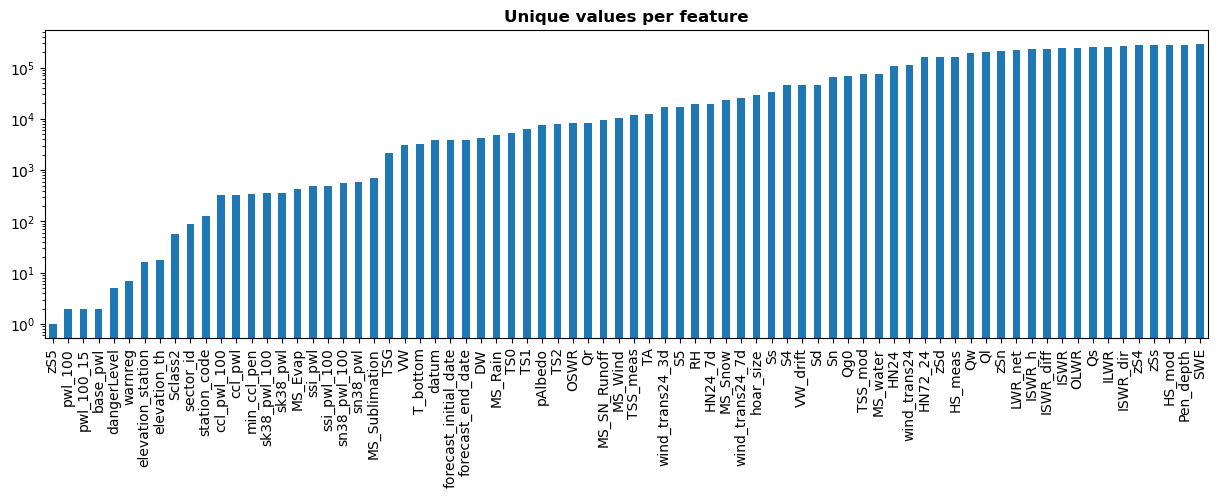

In [34]:
unique_values = data.nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(15, 4))
plt.title("Unique values per feature", fontsize = 12, fontweight= "bold")
plt.show()

We see that `zs5` has only one value and hasn't any missing values and that `pwl_100`, `pwl_100_15` and `base_pwl` contain 2 different values that we expect to be 0 and 1. 

In [35]:
data.zS5.unique()

array([0])

In [36]:
data.pwl_100.unique()

array([ 1.,  0., nan])

In [37]:
data.pwl_100_15.unique()

array([ 1.,  0., nan])

In [38]:
data.base_pwl.unique()

array([ 1.,  0., nan])

We delete `zS5`.

In [39]:
data.drop("zS5", axis=1, inplace=True)

Let's now check the granularity of our data according to dates. The SLF avalanche forecast as we said is published once at 8am and once at 5pm. Let's see what are the possible values of the hours in `forecast_initial_date` and `forecast_end_date`. 

In [40]:
data.forecast_initial_date.dt.hour.unique()

array([17])

In [41]:
data.forecast_end_date.dt.hour.unique()

array([17])

We understand that to make it simple and homogeneous, this dataset didn't record the danger level at 8 am as the bulletin forecast generally does (once at 8 am, once at 5pm).

We know that the danger level, the meteorological and profile data were collected daily. Let's check if the time gap between `forecast_initial_date` and `forecast_end_date` is always a day.

In [42]:
nb_day_gaps = (data["forecast_end_date"] == data["forecast_initial_date"] + pd.Timedelta(days=1)).sum()
print("The gap between forecast_end_date and forecast_initial_date is a day:")
print("{} of time representing {}% of time".format(nb_day_gaps, nb_day_gaps/data.shape[0]*100))

The gap between forecast_end_date and forecast_initial_date is a day:
292837 of time representing 100.0% of time


We conclude that `forecast_end_date` is always the exact day after `forecast_initial_date`. 

Let's see now if the date of `forecast_initial_date` is always equals to `datum`. 

In [43]:
mask = (data.forecast_initial_date.dt.date == data.datum)
print("The dates in datum and forecast_initial_date match:")
print("{} of time of representing {}% of the time".format(mask.sum(), mask.sum()/data.shape[0]*100))

The dates in datum and forecast_initial_date match:
292837 of time of representing 100.0% of the time


Thanks to the two observations from above, we might delete `forecast_initial_date` and `forecast_end_date` later because they don't add any additional information than `datum`. But first let's check the missing values. 

#### vii) Quality of the data <a id="miss_val"></a>

Let's see if there are some duplicates.

In [44]:
data.duplicated().sum()

0

Let's explore the missing values.

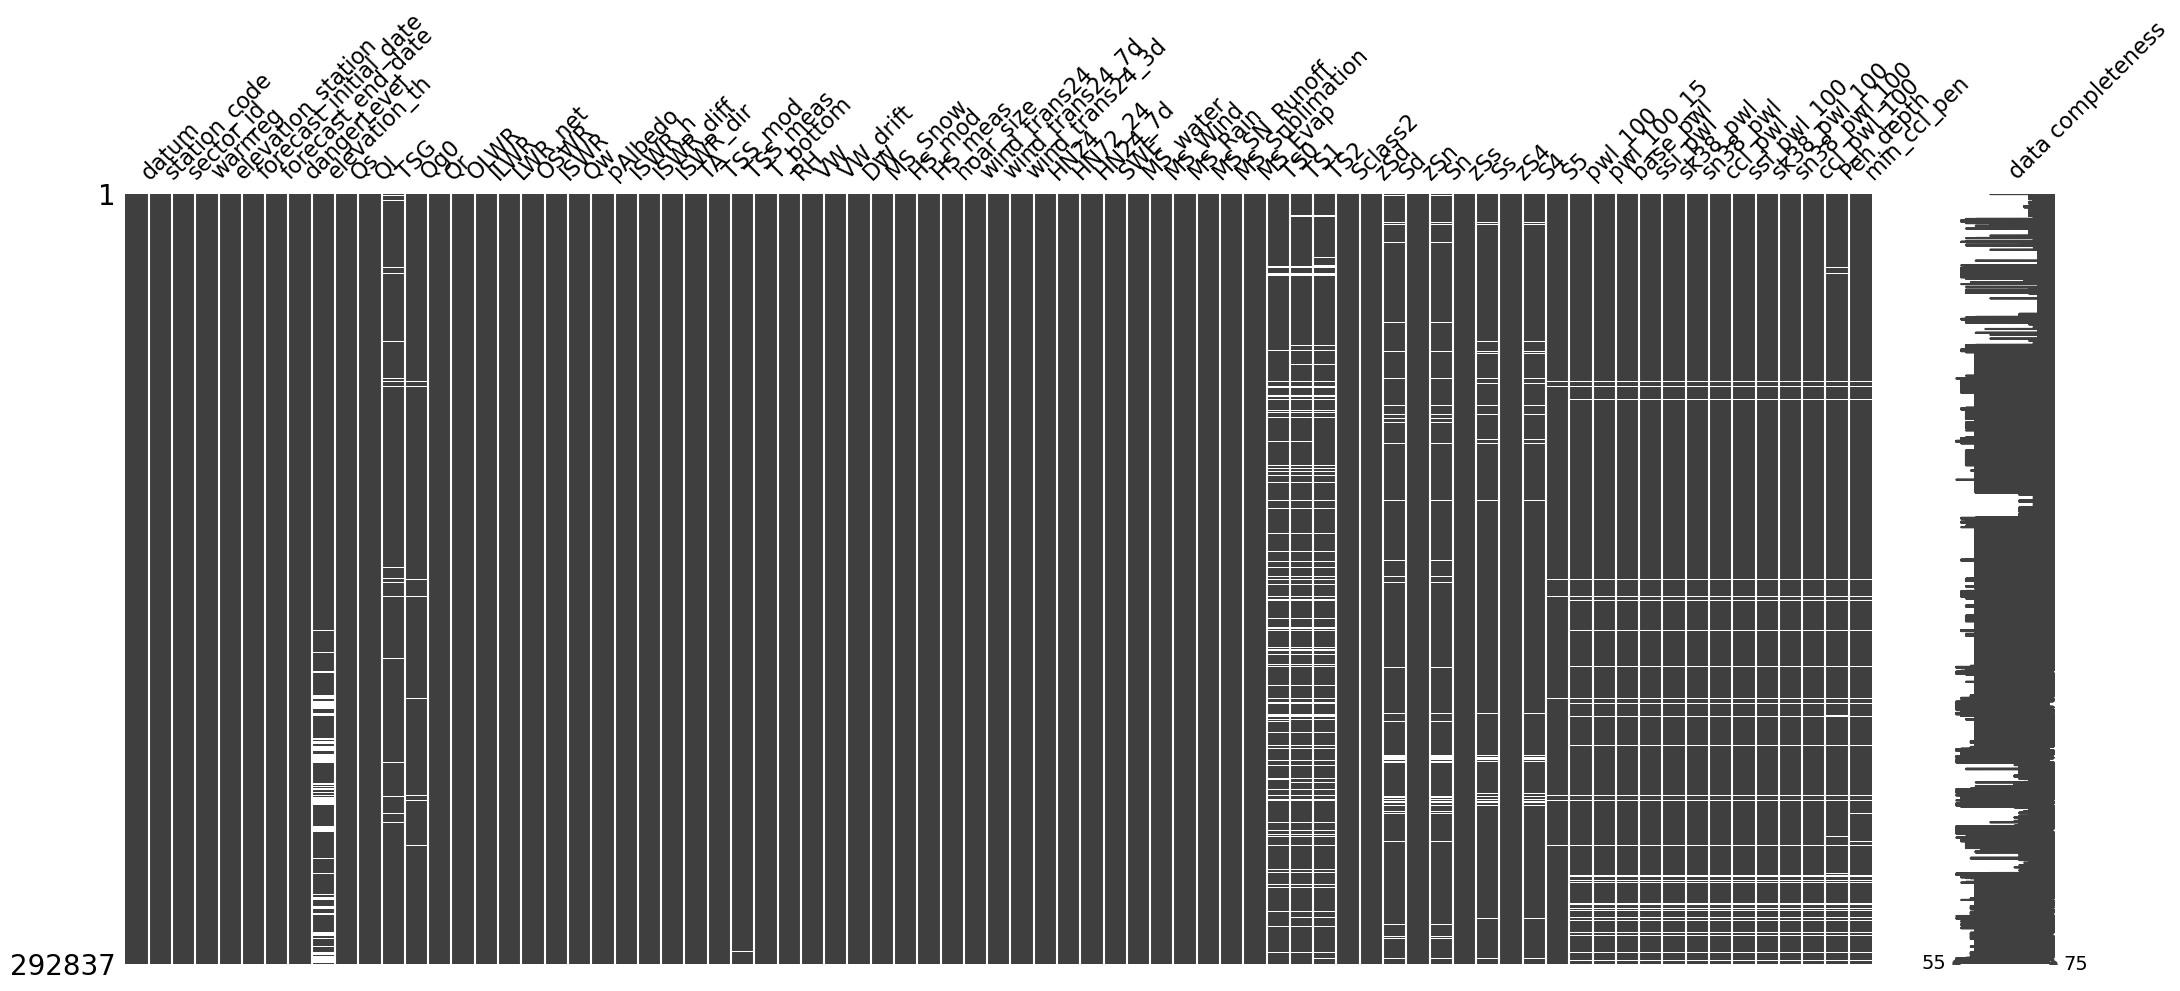

In [45]:
import missingno as msno

msno.matrix(data, labels = True);

We see that missing values are consistent throughout sets of features for some observations: 

On the right hand side of this matrix, we see that some observations have missing values in all of the last 15 features. In fact, these features are the ones collected from the snow profiles. We can make the same observation with the groups of features formed by  `TSO`, `TS1` and `TS2`, and `Sd`, `Sn`, `Ss` and `S4`.

Finally, we can already see that `elevation_th` has a significant amount of missing values. This can be inconvenient, because this variable has always to be put in perspective with `dangerLevel`.

Let's see the numbers and the percentages of missing values in the whole data set, in the target variable `dangerLevel` and in `elevation_th`.

In [46]:
nb_na = data.isna().sum().sum()
percentage = nb_na / data.size * 100

dl_na = data.dangerLevel.isna().sum()
percent_dl_na = dl_na / data.shape[0] * 100


elevation_na = data.elevation_th.isna().sum()
percent_el_na = elevation_na / data.shape[0] * 100

print("There are {} of missing values in the whole dataset, representing {:.2f}%".format(nb_na, percentage))
print("There are {} of missing values in dangerLevel, representing {:.2f}%".format(dl_na, percent_dl_na))
print("There are {} of missing values in elevation_th, representing {:.2f}%".format(elevation_na,
                                                                                    percent_el_na))

There are 324328 of missing values in the whole dataset, representing 1.48%
There are 0 of missing values in dangerLevel, representing 0.00%
There are 33692 of missing values in elevation_th, representing 11.51%


Overall, we have only a few missing values, no missing values in the target variable which is great, but 11% in `elevation_th` which is significant. 

We build a table below representing the features that have missing values, their description, their corresponding numbers of missing values and the corresponding percentages.

In [47]:
df_percentages = pd.DataFrame(index = ["Sum of missing values", "Percentage"] , columns = data.columns)
df_percentages.loc["Sum of missing values",:] = data.isna().sum()
df_percentages.loc["Percentage"]= data.isna().mean()*100

df_percentages.loc["Percentage"]= df_percentages.loc["Percentage"].astype(float).round(2) 
# We round those values to see them in a more convenient way. 

# We use the transposed method to have a better view on those datas and we have sorted them by descending order
percent_na = df_percentages.T.sort_values(by="Percentage", ascending = False)

#Take all the features that have a non-null number of missing values
percent_na = percent_na[percent_na["Percentage"]!=0]

# Take all the corresponding descriptions in meta_data
descriptions = [x for name in percent_na.index 
                for x in meta_data.loc[meta_data["Feature name"] == name, "Feature description"]]

#Gives a description for elevation_threshold which is not present in meta_data
descriptions.insert(0,"Elevation threshold") 

percent_na["Description"] = descriptions

percent_na

,Sum of missing values,Percentage,Description
elevation_th,33692,11.51,Elevation threshold
TS2,30313,10.35,Snow temperature at 1 m [∘C]
TS1,28884,9.86,Snow temperature at 0.5 m [∘C]
TS0,25859,8.83,Snow temperature at 0.25 m [∘C]
Sd,15449,5.28,Deformation rate stability index [–]
Sn,15449,5.28,Natural stability index [–]
Ss,14185,4.84,Sk38 skier stability index [–]
S4,14185,4.84,Structural stability index [–]
Pen_depth,11315,3.86,Skier penetration depth [cm]
min_ccl_pen,10986,3.75,Min critical cut length at a deeper layer of the penetration depth [m]


We can see that a lot of variables share the same amount of missing values, this can be due to some stations that couldn't measure some variables at some dates.

Let's see what is the maximum missing values a data point can hold.

In [48]:
max_na = data.isna().sum(axis=1).sort_values(ascending=False).max()
print("At most, rows have {} missing values over {}.".format(max_na, data.shape[1]))

At most, rows have 20 missing values over 75.


In [49]:
rows_w_na = (data.isna().sum(axis=1) > 0).sum()
percent_row_w_na = rows_w_na / data.shape[0] * 100

print("We have {} rows that have at least one missing value, representing {:.2f}%".format(rows_w_na,
                                                                                         percent_row_w_na))

We have 81065 rows that have at least one missing value, representing 27.68%


This is a bad new, because it means that removing every observation that has missing values would delete around 30% of the data.

### (b) Plan to manage and process the data

#### i) Data managing

We will always work with the dataset provided by [[11]](#ref11) jointly with the variable descriptions, the station list and the warning regions descriptions. We plan to save the data as csv (for the dataset and the station list), xlsx (for the descriptions of the variables) files or getting the warning regions descriptions by an API call and store them in dataframes as we did. 

#### ii) Data cleaning and manipulation

As we have multiple features for makes it difficult to have good and precise insights, we plan to build lists to sort the features according to different criteria:

- if they are modelled, measured, coming from the profile studies or extracted
- if the data are of type continuous, integer, strings or dates
- their units (cm, degrees, `-`, `[W m-2]`, ...)
- type of measured quantity (such as air, temperature, wind, snowfall)  

With the help of these lists, it will be more comfortable for us to :

0) Change the name `datum` into `date` for convenience

1) Remove some stations if they collect large number of missing values

1) Change the data types of the remaining features that contain de facto integers except `warnreg` and `sector_id` that are identifiers.

2) We saw that some observations share missing values in same features with others, so we plan to explore if those missing values can come from the same dates or from specific stations. Then we plan to remove observations that reach a certain level of missing values according to the observations we will have made.

3) Remove `forecast_initial_date` and `forecast_end_date` because they differ from a day consistently, and the date in `forecast_initial_date` is always the same than the one in `datum`. 

4) We plan to investigate possible inconsistencies in the data. To do so, we will first have to take the time to really understand what are the features. Indeed, we do have a good understanding of the majority of the features such as `TA` which is the air temperature daily averages. But for others, like `MS_SN_Runoff`, which represents `Virtual lysimeter [kg s−2 h−1]`, it will require some little research to understand more precisely what this feature measures and how to interpret its unit. This clearly affects our ability to detect inconsistencies. By doing so, we will be able to see if there are any absurd values in our data (for example, detecting a data point that is far outside the range allowed by its unit).

#### iii) Feature engineering

We plan to:

- apply log transformations to the variables that have left skewed distributions if there are some

- apply One-Hot-Encoding on the categorical variables such as `warnreg`, `sector_id`, `station_code`. As the majority of the models we will train don't handle categorical data, this is mandaroty. We will do this between the end of our EDA and the start of Machine Learning model implementation part

- applying a PCA analysis (at the start of the model implementation part). 

## 3) Exploratory data analysis (EDA)

Before going into Exploratory Data Analysis, we need to split our data into training and test sets. Before doing so, let's remove `forecast_initial_date` and `forecast_end_date`.

In [50]:
data.drop(["forecast_initial_date", "forecast_end_date"], axis=1, inplace=True)

To decide from which date or year we'll split our data (we will build the test set with the most recent observations), let's check how many different stations appear in the data per year and what percentage of the total dataset is covered by starting from a given year.

In [51]:
data["year"] = data.datum.dt.year
years = data.year.unique()
counts = []

for year in years:
    unique_stations = len(data[data["year"] == year].station_code.unique())
    counts.append(unique_stations)

data.drop("year", axis=1, inplace=True) # Remove the extra feature

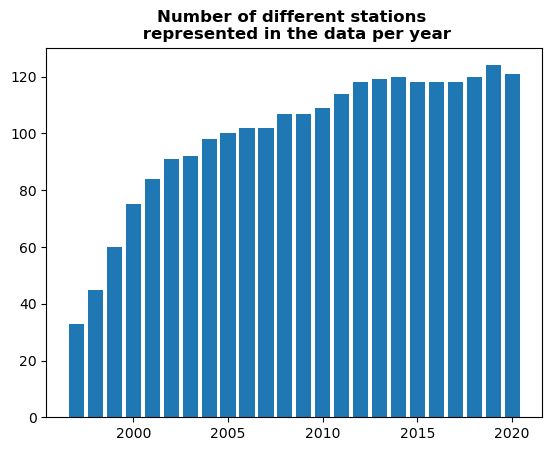

In [52]:
plt.bar(x = years, height = counts)

plt.title("Number of different stations \n represented in the data per year", fontsize=12, fontweight = "bold")
plt.show()

From 2005, the number of stations increase slowly compared to the period 1997-2005. From 2012, the number of different stations stays close to 120 until 2020. 

In [53]:
sample_percentage = []

for year in years: 
    percent = data[data.datum.dt.year >= year].shape[0]/data.shape[0]*100
    sample_percentage.append(percent)

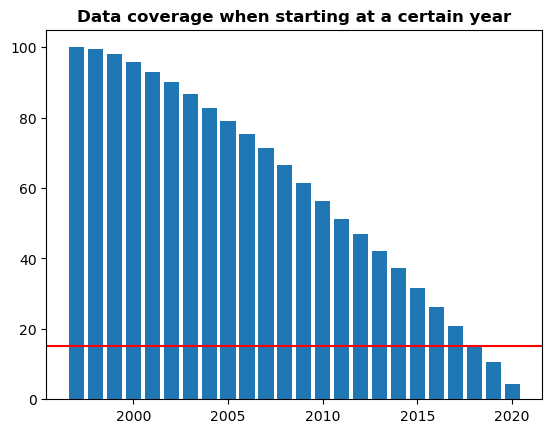

In [54]:
plt.bar(x = years, height= sample_percentage)

plt.title("Data coverage when starting at a certain year", fontsize = 12, fontweight = "bold")
plt.axhline(y=15, color="r", linestyle="-")
plt.show()

The red line has equation $y=15$. So by making our test set with only data from the year 2018 (included), we will get around 15% of the data. 

With the two observations from above, we decide to split the data from the month of september of 2017, so our dataset will be have the entire hydrological year and winter 2017-2018 and all the values of the year 2018. 

In [55]:
date_limit = pd.to_datetime("2017-31-08", format = "%Y-%d-%m")
mask = (data["datum"] <= date_limit)

data_tr  = data.loc[mask].copy()
data_tr.reset_index(drop=True, inplace=True)

data_te = data.loc[~mask].copy()
data_te.reset_index(drop=True, inplace=True)

data = data_tr.copy() # To make it just more convenient to call

In [56]:
print("The train set has :")
print("{} samples, or {:.2f}% of the whole dataset\n".format(data.shape[0],
                                                      data.shape[0]/(data.shape[0]+data_te.shape[0])*100))
print("The test set has:")
print("{} samples, or {:.2f}% of the whole dataset".format(data_te.shape[0],
                                                      data_te.shape[0]/(data.shape[0]+data_te.shape[0])*100))


The train set has :
244327 samples, or 83.43% of the whole dataset

The test set has:
48510 samples, or 16.57% of the whole dataset


### (a) Preliminary EDA

#### i) Informative plots of the features and statistics

##### i.i) Danger Level and Elevation Threshold  <a id="frequenty"></a>

The avalanche danger level takes most of the time the values 2 and 3 while the danger 5 is rare.

In [57]:
# Function to add labels on top of the bars given x, y
def add_labels(x, y, h_ratio):
    for i in range(len(x)):
        plt.text(x=i+1, 
                 y=y[i] + y[i]*h_ratio,
                 s=y[i],
                 ha='center')

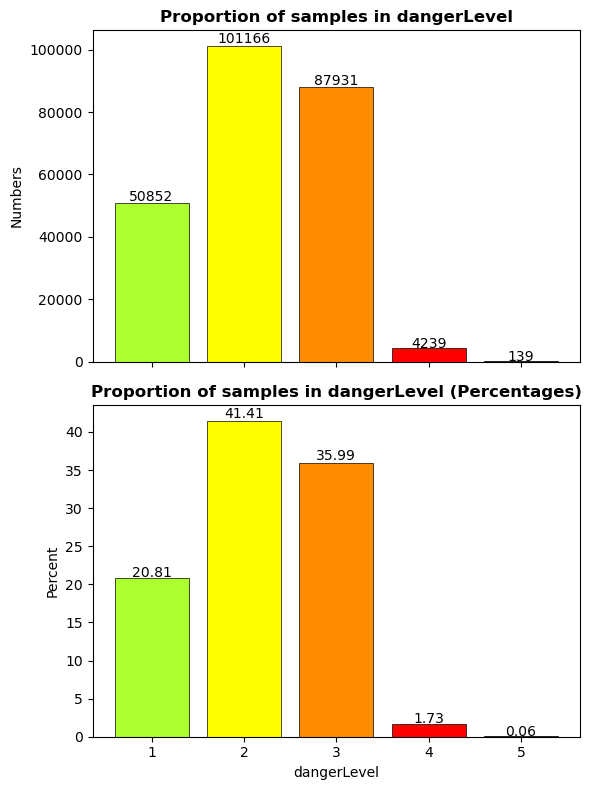

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6, 8))

# Take the dangers ranging from 1 to 5 
x = data.dangerLevel.value_counts(sort=False).index

# Take the occurency of each danger level
y_count = data.dangerLevel.value_counts(sort=False).values

# Take the percentages of each danger level
y_per = round(data.dangerLevel.value_counts(sort=False) / data.shape[0] * 100, 2).values

# Setting the colors similar than in the avalanche forecast
colors = ["greenyellow", "yellow", "darkorange", "red", "black"]

axes[0].bar(x=x, height=y_count, color=colors, edgecolor="black", linewidth=0.5)
plt.sca(axes[0]) # To write on the right subplot
add_labels(x, y_count, h_ratio=0.01)
axes[0].set_ylabel("Numbers")
axes[0].set_title("Proportion of samples in dangerLevel", fontsize=12, fontweight="bold")

axes[1].bar(x=x, height=y_per, color=colors, edgecolor="black", linewidth=0.5)
plt.sca(axes[1]) 
add_labels(x, y_per, h_ratio=0.01)
axes[1].set_ylabel("Percent")
axes[1].set_title("Proportion of samples in dangerLevel (Percentages)", fontsize=12, fontweight="bold")
axes[1].set_xlabel("dangerLevel")

plt.tight_layout()
plt.show()


Well, 139 observations with danger 5 is extremely low knowing that our train set stores data from 1997 to 2017. And the number 139 doesn't even represent the number of days because there were probably few stations that recorded this danger level at the same time.

The danger 5 is rare in winter but not that much. Let's see when were recorded these observations. 

In [59]:
data[data.dangerLevel ==5].datum.unique()

array(['1999-02-08T00:00:00.000000000', '1999-02-21T00:00:00.000000000',
       '1999-02-22T00:00:00.000000000', '1999-02-23T00:00:00.000000000',
       '1999-02-24T00:00:00.000000000', '2000-05-02T00:00:00.000000000',
       '2004-01-13T00:00:00.000000000', '2006-03-04T00:00:00.000000000'],
      dtype='datetime64[ns]')

So there are only 8 days between 1997 and 2017 when the danger level 5 was recorded. And between those 8 days, 5 of them were recorded within 2 weeks. This is likely suspicious. This can be potentially explained if the stations are mainly situated in low or medium altitude because such a high level of danger is the result of a combination of several factors, often due to large quantities of snow falling with very, very strong gusts of wind. Conditions that occur more often at high altitude. We will investigate the altitude of the stations in the next part. 

Let's see now the distribution of `elevation_th`. Recall: `elevation_th` is always expressed in hundreds. 


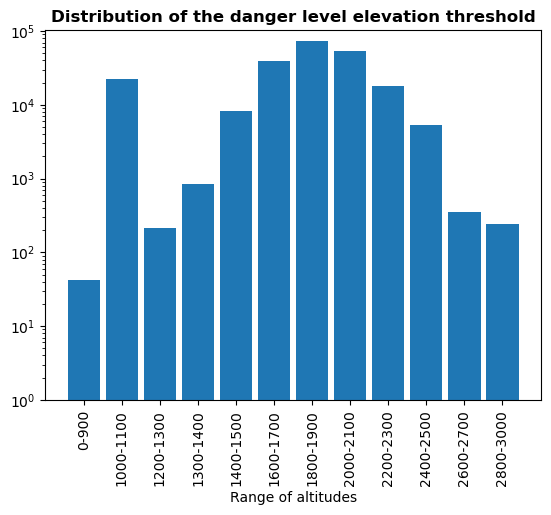

In [60]:
values = [data[data.elevation_th < 1000].shape[0],
          data[(data.elevation_th >= 1000) & (data.elevation_th <= 1100)].shape[0],
          data[(data.elevation_th >= 1200) & (data.elevation_th <= 1300)].shape[0],
          data[(data.elevation_th >= 1300) & (data.elevation_th <= 1400)].shape[0],
          data[(data.elevation_th >= 1500) & (data.elevation_th <= 1600)].shape[0],
          data[(data.elevation_th >= 1700) & (data.elevation_th <= 1800)].shape[0],
          data[(data.elevation_th >= 1900) & (data.elevation_th <= 2000)].shape[0],
          data[(data.elevation_th >= 2100) & (data.elevation_th <= 2200)].shape[0],
          data[(data.elevation_th >= 2300) & (data.elevation_th <= 2400)].shape[0],
          data[(data.elevation_th >= 2500) & (data.elevation_th <= 2600)].shape[0],
          data[(data.elevation_th >= 2700) & (data.elevation_th <= 2800)].shape[0],
          data[(data.elevation_th >= 2800)].shape[0]]

x = np.arange(0,2*len(values),2)

labels  = ["0-900", "1000-1100", "1200-1300", "1300-1400","1400-1500", "1600-1700",
         "1800-1900", "2000-2100", "2200-2300", "2400-2500", "2600-2700", "2800-3000"]

plt.bar(height = values, x=x, log=True, width = 1.7)

plt.xlabel("Range of altitudes")
plt.title("Distribution of the danger level elevation threshold", fontsize=12, fontweight="bold")
plt.xticks(ticks = x, labels = labels, rotation=90)
plt.ylim(1, max(values)*1.4)
plt.show()


We see that mainly `elevation_th` lies between 1400 and 2500 meters. There are also a significant number of observations for which `elevation_th` is between 1000 and 1100 meters. 

The other altitudes for `elevation_th` are quite rare. We can see there are a few observations for which `elevation_th` is below 1000m. Let's have a look.

In [61]:
data.loc[data["elevation_th"]<1000, "elevation_th"].value_counts()

0.0    42
Name: elevation_th, dtype: int64

In fact for those observations the value in `elevation_th` is always equal to 0. This is not impossible. Indeed, we can interpret it as the danger level can be homogeneous throughout all altitudes, so that `elevation_th` is defined as 0. 

But let's have a closer look at which dates and at which stations these observations were made. 

In [62]:
data.loc[data["elevation_th"]==0, "datum"].unique()

array(['1999-05-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [63]:
data.loc[data["elevation_th"]==0, "station_code"].unique()

array(['TUJ3', 'ARO2', 'LUM2', 'DAV2', 'ZER2', 'PUZ2', 'NAR2', 'TUJ2',
       'SIM2', 'ARO3', 'ROA2', 'PAR2', 'DTR2', 'MEI2', 'LAG3', 'ELS2',
       'ANV2', 'LAG2', 'ANV3', 'GAN2', 'TRU2', 'SAA3', 'JUL2', 'BEV2',
       'GAD2', 'CHA2', 'URS2', 'VIN2', 'SCH2', 'KES2', 'VAL2', 'BED3',
       'KLO3', 'SAA2', 'SLF2', 'FIS2', 'OTT2', 'VDS2', 'BED2', 'FIR2',
       'FAE2', 'KLO2'], dtype=object)

Now this becomes suspicious. If it is possible for `elevation_th` to be 0 for the reasons we explained above, it is highly unlikely that this can happen in May. If the elevation threshold is 0, it means they were great snowfall at every altitude and it is rare in May. 

##### i.ii)  Elevation and location of stations

Let's check the elevation of the stations. We saw that `elevation_station` in `data` is the elevation of the station rounded to the nearest hundred. So we can check the distribution of the rounded `elevation` in the station list.

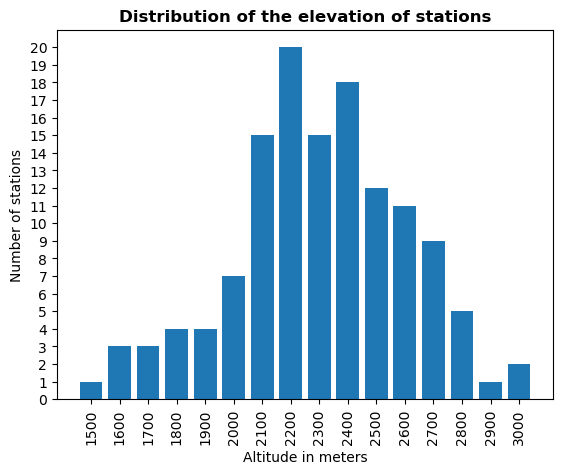

In [64]:
elevation = stations.elevation.copy()
elevation = round(elevation,-2)

plt.bar(height = elevation.value_counts().values,
        x = elevation.value_counts().index,
        width=80)

plt.ylabel("Number of stations")
plt.xlabel("Altitude in meters")
plt.title("Distribution of the elevation of stations", 
         fontsize=12, 
         fontweight="bold")

plt.yticks(np.arange(0,21,1))
plt.xticks(np.arange(1500,3100,100), rotation=90)
plt.show()

We can see that most of the stations are situated around 2000 and 2600m of altitude but their elevation can go up to 3000. 

This observation leaves us puzzled. Because we saw that the `dangerLevel` suspiciously takes the value 5 extremely rarely, and we thought that this could be caused by the stations lying in medium or low altitude. This plot shows us that this is definitely not the case. 

Let's have an overview on where the stations are situated in Switzerland.

<img src="../pictures_maps/elevation_stations.png" width="600" height="350">

We can also see their locations against the most recent warning region 21 which is effective since October 2019, as proved by the code below.

In [65]:
warnreg_def.iloc[[-1]]

,changes,id,valid_from_date,valid_to_date
10,Neue generalisierte Warnregionen in Zusammenhang mit der Integration der Waldbrandgebiete in die...,21,2019-10-01,2071-10-01


<img src="../pictures_maps/warnreg_21_stations.png" width="600" height="350">

We see that those stations are situated mainly in the alpine arc or at least in mountain regions. 

If you look closer (apologies for make you zoom in), we see that there can be multiple stations within the same sector (take the example of sector 4113 in the south-west part of Valais). 

Note: the stations represented by a yellow diamonds are only the ones present in our dataset. There are other IMIS stations that are not represented in the data so in the image above. 

##### i.iii) Features statistics

Let's see now the statistics. For convenience reasons, we show first the statistics of the features related to the danger level and the stations, and in a second time those of the meteorological and profile features.

In [66]:
# Statistics of the stations and dangerLevel related features
# Drop the column count 
data.iloc[:,:7].describe().T.drop("count", axis=1)

,mean,std,min,25%,50%,75%,max
elevation_station,2360.675243,261.470356,1600.0,2200.0,2400.0,2600.0,3000.0
dangerLevel,2.188166,0.779190,1.0,2.0,2.0,3.0,5.0
elevation_th,1938.945546,380.053839,0.0,1800.0,2000.0,2200.0,3000.0


In [67]:
# Meteorological and profile statistics
stats = data.iloc[:,7:].describe().T.drop(["count", "25%", "50%", "75%"], axis=1).copy()

# Add the feature descriptions
descriptions = []

for var in stats.index:
    description = meta_data.loc[meta_data["Feature name"]==var, "Feature description"].values[0]
    descriptions.append(description)
    
stats["Description"] = descriptions 

# Reorder the columns
stats= stats.iloc[:,[4,0,1,2,3]]
stats

,Description,mean,std,min,max
Qs,Sensible heat [W m−2],24.403772,24.441810,-352.447125,600.081000
Ql,Latent heat [W m−2],-3.577775,13.788774,-1054.155750,604.639375
TSG,Ground temperature [∘C],-0.335064,0.793801,-5.000000,4.992750
Qg0,Ground heat at soil interface [W m−2],2.083393,68.702989,-103.721250,28377.648000
Qr,Rain energy [W m2],0.061193,2.247405,-5.105750,871.680750
OLWR,Outgoing long-wave radiation [W m−2],268.485601,23.721386,177.450875,388.724000
ILWR,Incoming long-wave radiation [W m−2],189.491629,24.074924,113.487750,446.565375
LWR_net,Net long-wave radiation [W m−2],-82.779353,10.801164,-187.601000,204.501250
OSWR,Reflected short-wave radiation [W m−2],109.200533,67.261655,0.000000,630.755500
ISWR,Incoming short-wave radiation [W m−2],134.937270,90.360314,0.000000,1133.333000


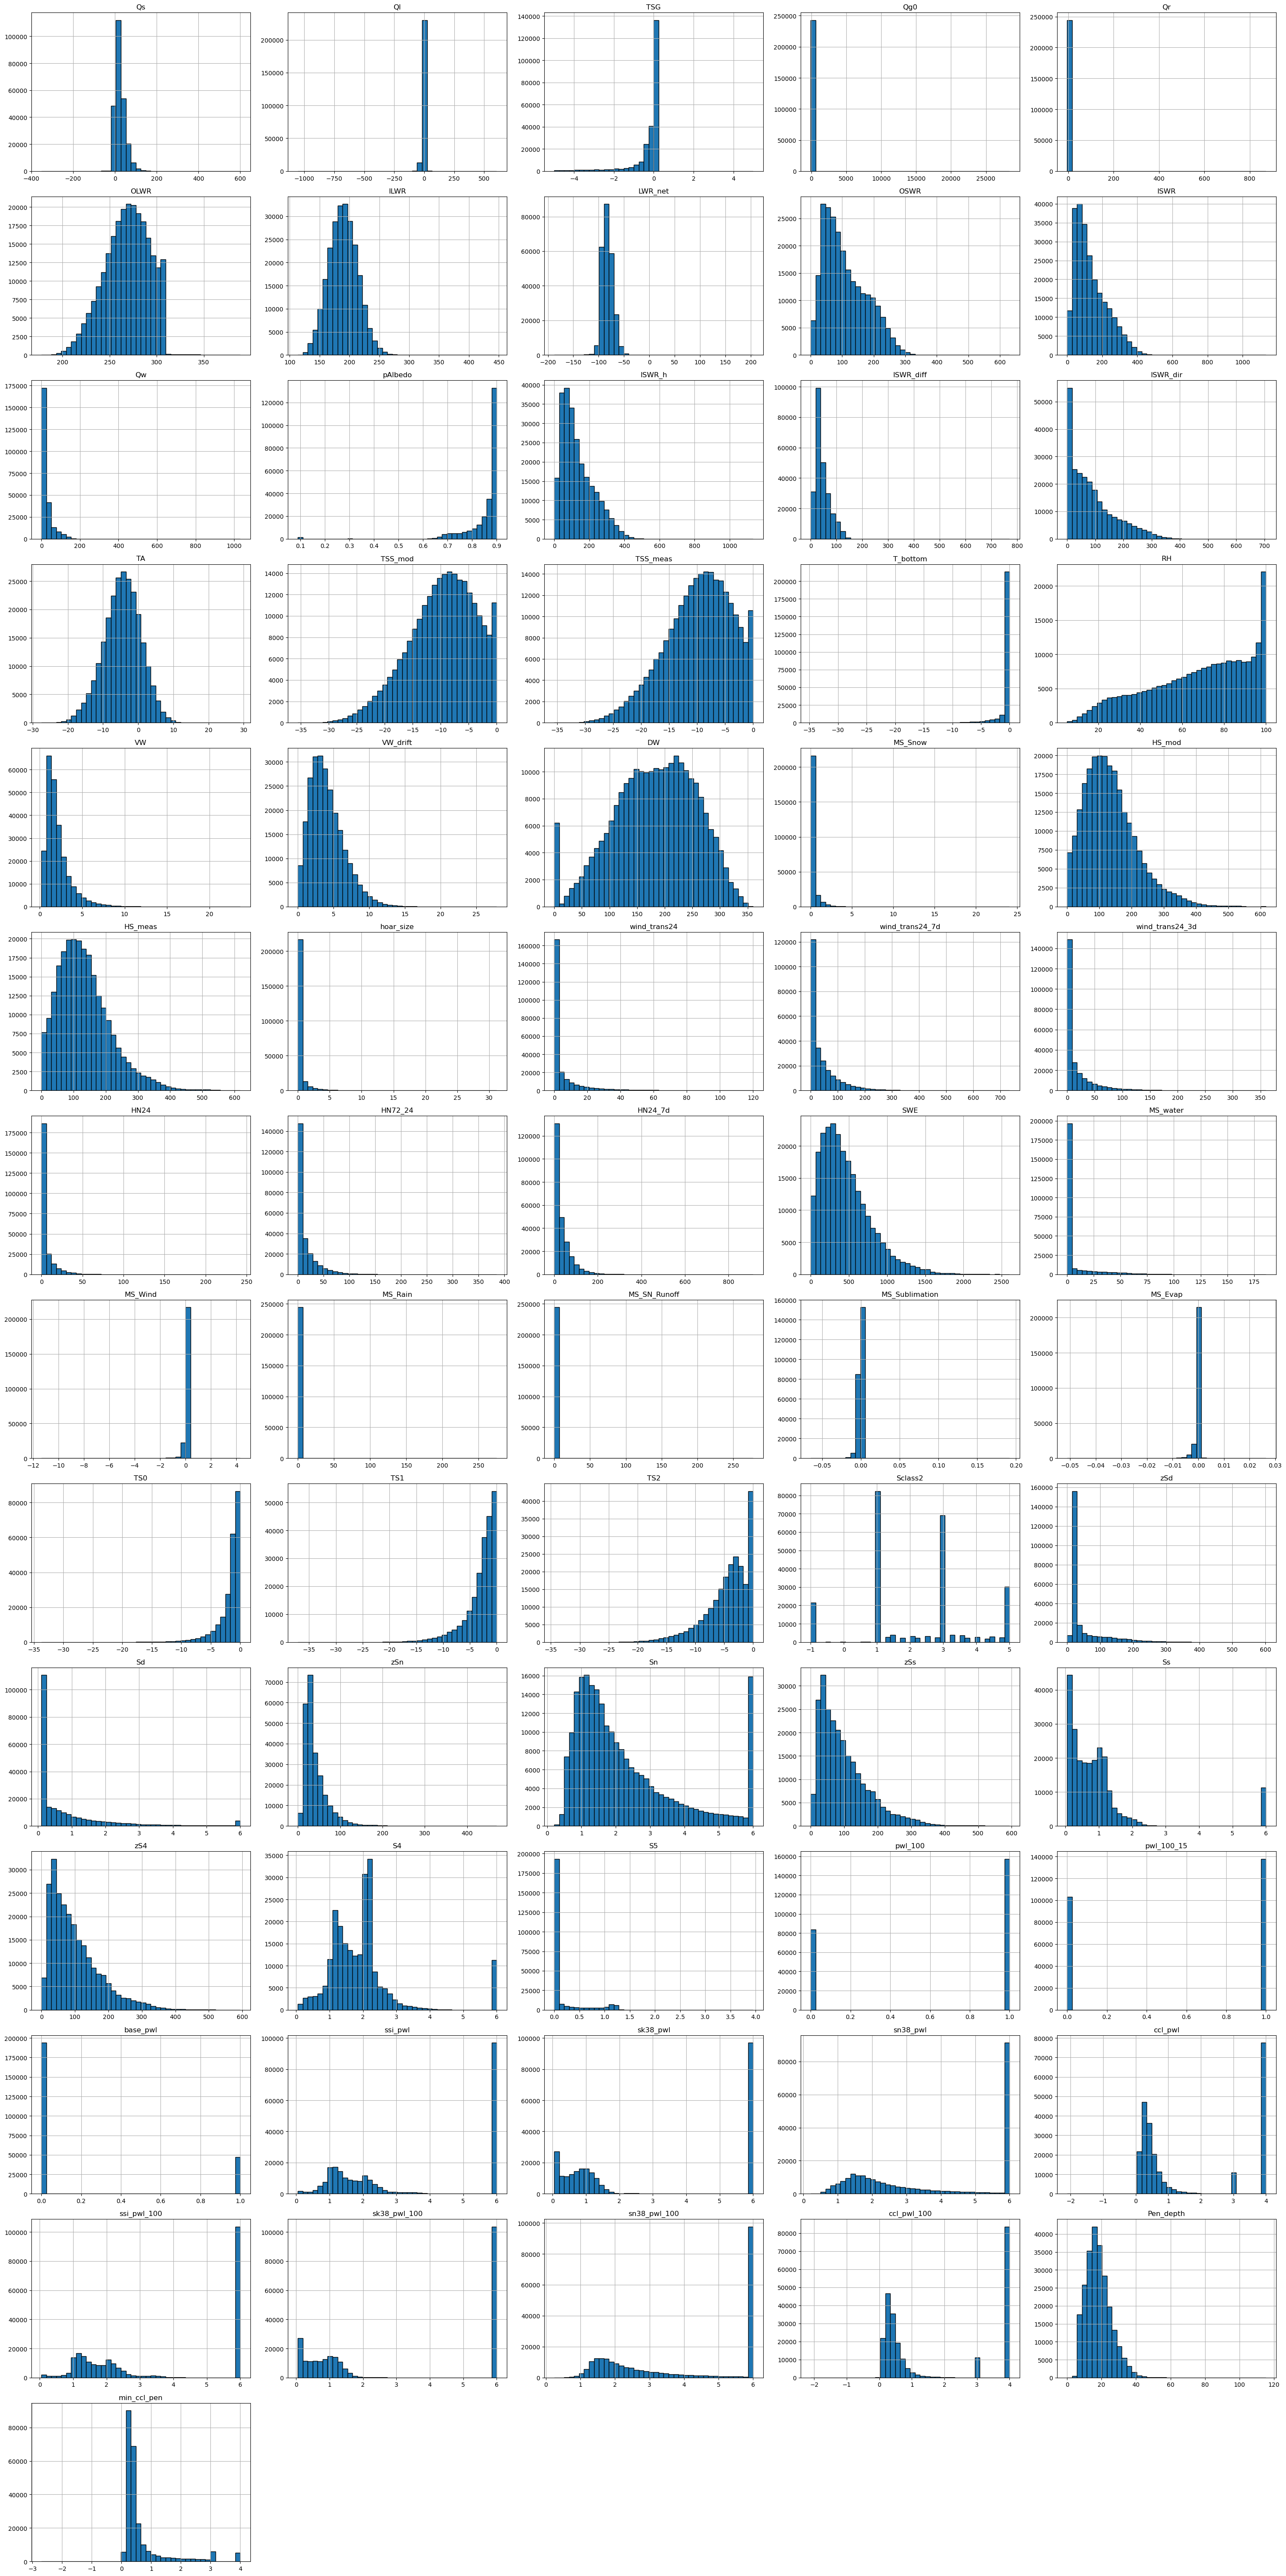

In [68]:
data.iloc[:,7:].hist(layout = (-1,5),
          figsize=(30,60),
          bins=40, 
          edgecolor="black")

plt.tight_layout()
plt.show()

We see that we have various distribution types: really nice bell-shaped distributions (take `TA`), truncated bell-shaped distributions (take `TSS_mod`), right or left skewed (take `pAlbedo` and `Pen_depth`) or they look like only bars around one value.

##### i.iv) Dates

Now let's come to dates. Let's see if the time period during which each stations stored data and if these periods are homogeneous.

In [69]:
time_min = data.groupby("station_code")["datum"].min().dt.date
time_max = data.groupby("station_code")["datum"].max().dt.date

time_range = pd.concat([time_min, time_max], axis=1)

time_range.columns = ["first date", "last date"]
time_range["period of measurement"] = time_range["last date"] - time_range["first date"]

time_range.head(10)

,first date,last date,period of measurement
station_code,,,
ALI2,2004-11-29,2017-04-24,4529 days
AMD2,1998-01-19,2017-04-14,7025 days
ANV2,1997-11-11,2017-05-08,7118 days
ANV3,1997-11-11,2017-05-08,7118 days
ARO2,1998-11-19,2017-05-08,6745 days
ARO3,1998-11-19,2017-05-08,6745 days
ATT2,2011-12-07,2017-05-08,1979 days
BED2,1997-11-11,2017-03-09,7058 days
BED3,1997-11-11,2017-04-22,7102 days


We can see the periods of measurement are not consistent accross all stations. We can see that some stations are quite new, as `ALB2`, while others started taking measurements way before, as `ANV2`. 

We have previously seen that there are only and stricly 24 hours between `forecast_initial_date` and `forecast_end_date`. The question now is "how much time separates the observations ? ".

To answer that question we make a copy of our data, select only the dates variable and `station_code` and reorganize it by sorting the values by `station_code` and then by dates `datum`. So that each pair of adjacent observations should be separated in time by a day (at least it is what we expect).

In [70]:
# Order by station and then by dates
# Take only the dates variables
dates = data.sort_values(by =  ["station_code","datum"],
                         ascending = [True, True])[["datum",
                                                    "station_code"]].copy() 

dates.reset_index(drop=True, inplace=True)
dates

,datum,station_code
0,2004-11-29,ALI2
1,2004-12-09,ALI2
2,2004-12-16,ALI2
3,2004-12-28,ALI2
4,2004-12-29,ALI2
...,...,...
244322,2017-05-04,ZNZ2
244323,2017-05-05,ZNZ2
244324,2017-05-06,ZNZ2
244325,2017-05-07,ZNZ2


We shift by one row `datum` and we take the difference in days from its original state, we store the result in a column `time gap with previous observation` that tells us how far apart in time the current observation is separated with the previous one in days. We make sure that if the value in `station_code` in the previous observation is different from the one in the current observation, then the time gap is 0. So, normally, every row should have 0 or 1 day in `time gap with previous observation`. 

In [71]:
# Shift the columns by 1 line to compare with the previous values
dates["prev_end_date"] = dates["datum"].shift(+1)
dates["prev_station"] = dates["station_code"].shift(+1)

# Compute the time gap only if the station is the same, otherwise fill with 0
same_station = dates["station_code"] == dates["prev_station"]
dates["time gap with previous observation"] =  dates["datum"]- dates["prev_end_date"]
dates.loc[~same_station, "time gap with previous observation"] = pd.Timedelta(days=0)

# Replace the NaN value in the first row by 0
dates["time gap with previous observation"].fillna(pd.Timedelta(days=0), inplace=True)

# Dropping the added columns
dates.drop(columns=["prev_end_date", "prev_station"], inplace=True)

dates.head()

,datum,station_code,time gap with previous observation
0,2004-11-29,ALI2,0 days
1,2004-12-09,ALI2,10 days
2,2004-12-16,ALI2,7 days
3,2004-12-28,ALI2,12 days
4,2004-12-29,ALI2,1 days


Let's see if this new column has values greater than 1 day. 

In [72]:
# Select rows that present a time hole
time_holes = dates[dates["time gap with previous observation"].dt.days > 1]
time_holes

,datum,station_code,time gap with previous observation
1,2004-12-09,ALI2,10 days
2,2004-12-16,ALI2,7 days
3,2004-12-28,ALI2,12 days
5,2005-01-08,ALI2,10 days
6,2005-01-10,ALI2,2 days
...,...,...,...
244130,2016-04-18,ZNZ2,2 days
244131,2016-04-20,ZNZ2,2 days
244145,2016-05-06,ZNZ2,3 days
244148,2016-11-10,ZNZ2,186 days


We have around 17'000 time "holes" in our data. We can see the pairs of dates that are adjacent in our table but not in time.

In [73]:
index = time_holes.index

 # Take the indices of the previous observation
index = np.concatenate([index, index-1]) # Drop the index 0 to avoid error message
index = np.sort(index) # Sort the index
index = np.unique(index) # Take the unique values

dates.loc[index,:]

,datum,station_code,time gap with previous observation
0,2004-11-29,ALI2,0 days
1,2004-12-09,ALI2,10 days
2,2004-12-16,ALI2,7 days
3,2004-12-28,ALI2,12 days
4,2004-12-29,ALI2,1 days
...,...,...,...
244145,2016-05-06,ZNZ2,3 days
244147,2016-05-08,ZNZ2,1 days
244148,2016-11-10,ZNZ2,186 days
244162,2016-11-24,ZNZ2,1 days


These time holes are not necessarily a problem but we have to investigate more. As the dataset is about the avalanche danger, it seems logical that the SLF stations didn't measure any sort of data related to it during summer. If these time holes are only the time gaps between the last days of measurement of the winter season and the first day of the next winter season then there will be no problem. 

To begin our investigation, let's see during which months the stations collected the data and the danger level. We provide here a bar plot that shows the number of observation for each month in a log scale (so we can clearly see if some months have no data). 

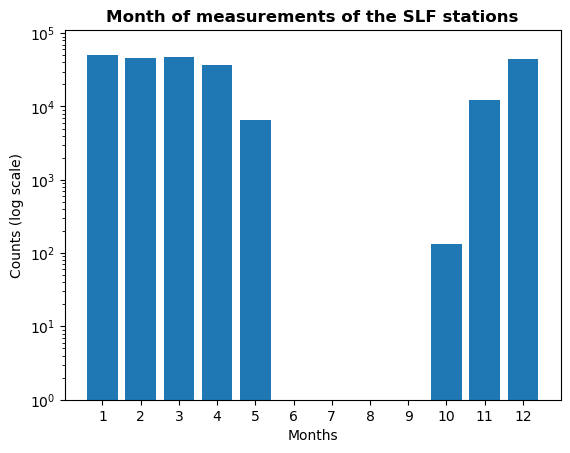

In [74]:
month = np.arange(1,13)

x = data.datum.dt.month.value_counts().sort_index().index
y = data.datum.dt.month.value_counts().sort_index().values

plt.bar(x = x, 
        height = y, 
       log = True)

plt.xticks(month)
plt.title("Month of measurements of the SLF stations", fontsize = 12, fontweight = "bold")
plt.xlabel("Months", fontsize=10)
plt.ylabel("Counts (log scale)", fontsize = 10)
plt.ylim(1, max(values)*1.5)
plt.show()

There isn't any data available during the period between June and September included, as we expected. Let's see now if the time holes we found previously match roughly the time gap between the 1st of June and the 30th of September, which is 122 days. We are looking at the sample for where the value in `time gap with previous observation` is at least 122 days.

In [75]:
A = (time_holes["time gap with previous observation"].dt.days >= 122) 
#B = (time_holes["time gap with previous observation"].dt.days < 360)
mask =  A 
time_holes[mask].shape[0]

1777

This roughly explains around 10% of all the time holes we found previously.

#### ii) Relations between the features 

We want to study the relations between the features themselves and then to look closer at their relation with `dangerLevel`.

Let's check the clustermap from Seaborn to see if there are clusters of features that are highly correlated with each other. 

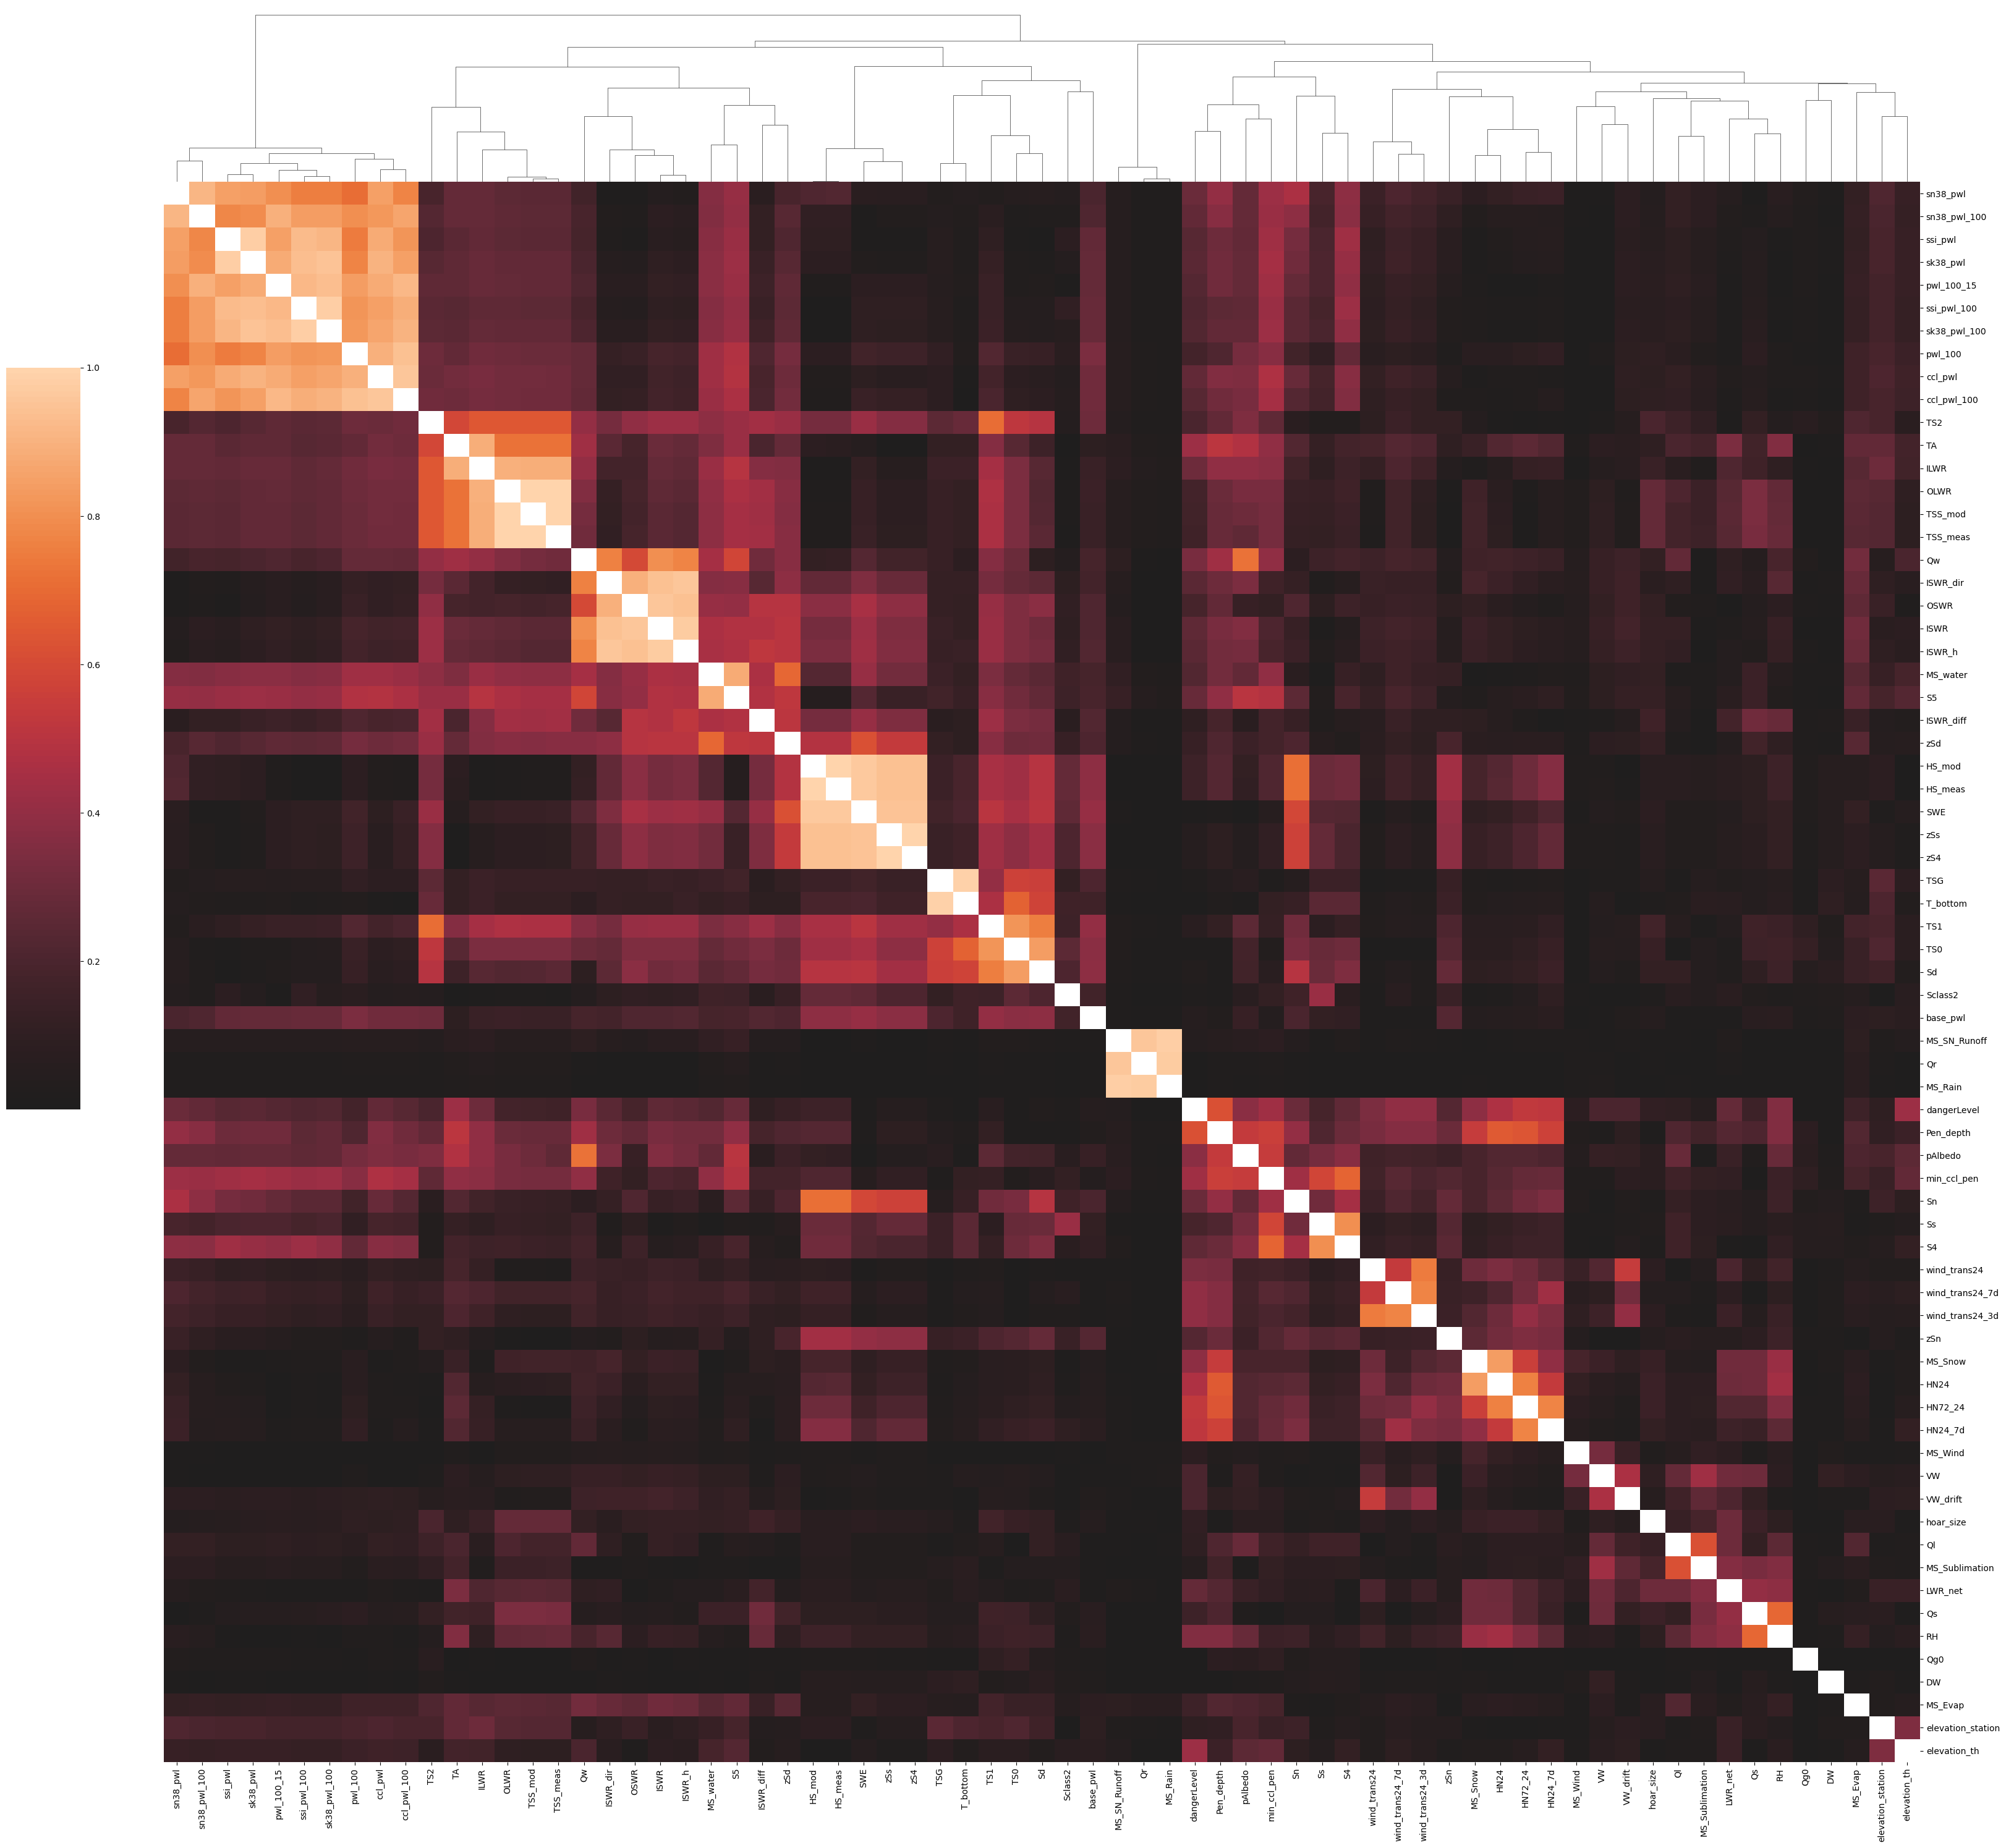

In [76]:
corr = data.corr()

abs_corr = np.abs(corr) #Take the absolute values

cluster_map = sns.clustermap(abs_corr,
               mask=np.eye(len(abs_corr)),
               center=0, cbar_pos=(-0.08, 0.4, 0.04, 0.4), dendrogram_ratio=(0, 0.1),
               figsize=(30, 30));

We can see that there are a few "clusters" or "groups of features" that are highly correlated with each other. We have the 7 following clusters: 

- `sn38_pwl`, `sn38_pwl_100`, `ssi_pwl`, `sk38_pwl`, `pwl_100_15`, `ssi_pwl_100`, `sk38_pwl_100`, `pwl_100`, `ccl_pwl`, `ccl_pwl_100`

- `MS_SN_Runoff`, `Qr`, `MS_Rain`

- `HS_mod`, `HS_meas`, `SWE`, `zS4`, `zSs`

- `TSG`, `T_bottom`

- `TA`, `ILWR`, `OLWR`, `TSS_mod`, `TSS_meas`

- `Qw`, `ISWR_dir`, `OSWR`,`ISWR`, `ISWR_h`

- `MS_water`, `S5`

We study more closely the correlation coefficients between the features within each cluster. 

In [77]:
# Definition of the clusters
clusters = [["sn38_pwl", "sn38_pwl_100", "ssi_pwl", "sk38_pwl", "pwl_100_15", "ssi_pwl_100",
             "sk38_pwl_100", "pwl_100", "ccl_pwl", "ccl_pwl_100"], # Cluster 1
            ["MS_SN_Runoff", "Qr", "MS_Rain"], # Cluster 2
            ["HS_mod", "HS_meas", "SWE", "zS4", "zSs"], # Cluster 3
            ["TSG", "T_bottom"], # Cluster 4
            ["TA", "ILWR", "OLWR", "TSS_mod", "TSS_meas"], # Cluster 5
            ["Qw", "ISWR_dir", "OSWR","ISWR", "ISWR_h"], # Cluster 6
            ["MS_water", "S5"] # Cluster 7
           ]

# Store for each cluser the definitions of its features and correlation matrix
definitions = []
corr_matrices = []

for cluster in clusters:
    
    definition = meta_data[meta_data["Feature name"].isin(cluster)]
    corr_matrix = round(data[cluster].corr(), 2)
    
    definitions.append(definition)
    corr_matrices.append(corr_matrix)

Let's start with the first cluster, we provide here the descriptions of its features. 

In [78]:
definitions[0]

,Feature description,Feature name,Type
54,Persistent weak layer(s) in the 100 cm from the surface [–],pwl_100,Profile
55,Persistent weak layer(s) at depths between 15 and 100 cm [-],pwl_100_15,Profile
57,Structural stability index at weak layer [–],ssi_pwl,Profile
58,Structural stability index at surface weak layer [–],ssi_pwl_100,Profile
59,Sk38 skier stability index at weak layer [–],sk38_pwl,Profile
60,Sk38 skier stability index at surface weak layer [–],sk38_pwl_100,Profile
61,Natural stability index at weak layer [–],sn38_pwl,Profile
62,Natural stability index at surface weak layer [–],sn38_pwl_100,Profile
63,Critical cut length at weak layer [m],ccl_pwl,Profile
64,Critical cut length at surface weak layer [m],ccl_pwl_100,Profile


These are the profile variables. In fact, the cluster 1 doesn't have all the profile variables, it is missing `base_pwl`, `min_ccl_pen` and `Pen_depth`.

In [79]:
meta_data[meta_data["Type"]=="Profile"]

,Feature description,Feature name,Type
54,Persistent weak layer(s) in the 100 cm from the surface [–],pwl_100,Profile
55,Persistent weak layer(s) at depths between 15 and 100 cm [-],pwl_100_15,Profile
56,Persistent weak layer at bottom [–],base_pwl,Profile
57,Structural stability index at weak layer [–],ssi_pwl,Profile
58,Structural stability index at surface weak layer [–],ssi_pwl_100,Profile
59,Sk38 skier stability index at weak layer [–],sk38_pwl,Profile
60,Sk38 skier stability index at surface weak layer [–],sk38_pwl_100,Profile
61,Natural stability index at weak layer [–],sn38_pwl,Profile
62,Natural stability index at surface weak layer [–],sn38_pwl_100,Profile
63,Critical cut length at weak layer [m],ccl_pwl,Profile


Let's see now the correlation coefficients in this cluster.

In [80]:
corr_matrices[0]

,sn38_pwl,sn38_pwl_100,ssi_pwl,sk38_pwl,pwl_100_15,ssi_pwl_100,sk38_pwl_100,pwl_100,ccl_pwl,ccl_pwl_100
sn38_pwl,1.00,0.91,0.85,0.84,-0.80,0.75,0.76,-0.71,0.85,0.77
sn38_pwl_100,0.91,1.00,0.78,0.80,-0.89,0.84,0.84,-0.80,0.83,0.86
ssi_pwl,0.85,0.78,1.00,0.98,-0.85,0.93,0.91,-0.74,0.88,0.82
sk38_pwl,0.84,0.80,0.98,1.00,-0.88,0.93,0.95,-0.77,0.90,0.85
pwl_100_15,-0.80,-0.89,-0.85,-0.88,1.00,-0.92,-0.93,0.84,-0.88,-0.91
ssi_pwl_100,0.75,0.84,0.93,0.93,-0.92,1.00,0.98,-0.81,0.85,0.88
sk38_pwl_100,0.76,0.84,0.91,0.95,-0.93,0.98,1.00,-0.83,0.86,0.90
pwl_100,-0.71,-0.80,-0.74,-0.77,0.84,-0.81,-0.83,1.00,-0.89,-0.94
ccl_pwl,0.85,0.83,0.88,0.90,-0.88,0.85,0.86,-0.89,1.00,0.96
ccl_pwl_100,0.77,0.86,0.82,0.85,-0.91,0.88,0.90,-0.94,0.96,1.00


We see that `pwl_100_15` and `pwl_100` are inversely correlated with the other features and overall all the coefficients are high, in absolute values. The lowest coefficient is :

In [81]:
np.abs(corr_matrices[0]).min().min()

0.71

The coefficients above 0.9 are situated: 

In [82]:
np.abs(corr_matrices[0])[np.abs(corr_matrices[0]>=0.9)]

,sn38_pwl,sn38_pwl_100,ssi_pwl,sk38_pwl,pwl_100_15,ssi_pwl_100,sk38_pwl_100,pwl_100,ccl_pwl,ccl_pwl_100
sn38_pwl,1.00,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sn38_pwl_100,0.91,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ssi_pwl,NaN,NaN,1.00,0.98,NaN,0.93,0.91,NaN,NaN,NaN
sk38_pwl,NaN,NaN,0.98,1.00,NaN,0.93,0.95,NaN,0.90,NaN
pwl_100_15,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
ssi_pwl_100,NaN,NaN,0.93,0.93,NaN,1.00,0.98,NaN,NaN,NaN
sk38_pwl_100,NaN,NaN,0.91,0.95,NaN,0.98,1.00,NaN,NaN,0.90
pwl_100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
ccl_pwl,NaN,NaN,NaN,0.90,NaN,NaN,NaN,NaN,1.00,0.96
ccl_pwl_100,NaN,NaN,NaN,NaN,NaN,NaN,0.90,NaN,0.96,1.00


We do the same with the other clusters.

In [83]:
definitions[1]

,Feature description,Feature name,Type
4,Rain energy [W m2],Qr,Modelled
36,Rain rate [kg s−2 h−1],MS_Rain,Modelled
37,Virtual lysimeter [kg s−2 h−1],MS_SN_Runoff,Modelled


In [84]:
corr_matrices[1]

,MS_SN_Runoff,Qr,MS_Rain
MS_SN_Runoff,1.00,0.95,0.98
Qr,0.95,1.00,0.97
MS_Rain,0.98,0.97,1.00


All the coefficients are above 0.9 in cluster 2.

In [85]:
definitions[2]

,Feature description,Feature name,Type
24,Snow height [cm],HS_mod,Modelled
25,Snow height [cm],HS_meas,Measured
33,Snow water equivalent [kg m−2],SWE,Modelled
49,Depth of Sk38 skier stability index [m],zSs,Modelled
51,Depth of structural stability index [cm],zS4,Modelled


In [86]:
corr_matrices[2]

,HS_mod,HS_meas,SWE,zS4,zSs
HS_mod,1.00,1.00,0.96,0.94,0.94
HS_meas,1.00,1.00,0.96,0.94,0.94
SWE,0.96,0.96,1.00,0.95,0.95
zS4,0.94,0.94,0.95,1.00,1.00
zSs,0.94,0.94,0.95,1.00,1.00


All the coefficients in the second cluster are above 0.9.

In [87]:
definitions[3]

,Feature description,Feature name,Type
2,Ground temperature [∘C],TSG,Measured
18,Bottom temperature [∘C],T_bottom,Modelled


In [88]:
corr_matrices[3]

,TSG,T_bottom
TSG,1.00,0.99
T_bottom,0.99,1.00


All the features have extremely high correlation coefficients.

In [89]:
definitions[4]

,Feature description,Feature name,Type
5,Outgoing long-wave radiation [W m−2],OLWR,Modelled
6,Incoming long-wave radiation [W m−2],ILWR,Modelled
15,Air temperature [∘C],TA,Measured
16,Surface temperature [∘C],TSS_mod,Modelled
17,Surface temperature [∘C],TSS_meas,Measured


In [90]:
corr_matrices[4]

,TA,ILWR,OLWR,TSS_mod,TSS_meas
TA,1.00,0.88,0.72,0.72,0.72
ILWR,0.88,1.00,0.90,0.89,0.89
OLWR,0.72,0.90,1.00,1.00,0.99
TSS_mod,0.72,0.89,1.00,1.00,1.00
TSS_meas,0.72,0.89,0.99,1.00,1.00


`ILWR` have coefficient close to 0.9 with all the other features. 

In [91]:
definitions[5]

,Feature description,Feature name,Type
8,Reflected short-wave radiation [W m−2],OSWR,Measured
9,Incoming short-wave radiation [W m−2],ISWR,Modelled
10,Net short-wave radiation [W m−2],Qw,Modelled
12,Incoming short wave on the horizontal [W m−2],ISWR_h,Modelled
13,Direct incoming short wave [W m−2],ISWR_dir,Modelled


In [92]:
corr_matrices[5]


,Qw,ISWR_dir,OSWR,ISWR,ISWR_h
Qw,1.00,0.76,0.60,0.80,0.77
ISWR_dir,0.76,1.00,0.89,0.94,0.95
OSWR,0.60,0.89,1.00,0.96,0.94
ISWR,0.80,0.94,0.96,1.00,0.98
ISWR_h,0.77,0.95,0.94,0.98,1.00


All features in cluster 6 have coefficient close or above 0.9 except `Qw`.

In [93]:
definitions[6]

,Feature description,Feature name,Type
34,Total amount of water [kg m−2],MS_water,Modelled
52,Stability index 5 [–],S5,Modelled


In [94]:
corr_matrices[6]

,MS_water,S5
MS_water,1.00,0.88
S5,0.88,1.00


The coefficient between those features is also very close to 0.9.

We provide below all the pairs of features that have the correlation coefficient above 0.9

In [95]:
# Take the upper triangle matrix 
triangle = np.triu(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(triangle)

# For each feature, take its correlation coefficient with the other features
# and select only the highest one, excluding the coefficient equals to 1
high_corr = corr.unstack()[(corr.unstack().abs() > 0.9) & (corr.unstack() != 1)]
high_corr = high_corr.sort_values(ascending = False)

high_corr = high_corr.reset_index()
high_corr = high_corr.rename(columns= {"level_0":"First feature",
                                       "level_1": "Second feature",
                                       0:"Corr coeff"})

# Add the descriptions 
des_1 = []
des_2 = []

for var in high_corr["First feature"]:
    description = meta_data.loc[meta_data["Feature name"]==var, "Feature description"].values[0]
    des_1.append(description)
     
for var in high_corr["Second feature"]:
    description = meta_data.loc[meta_data["Feature name"]==var, "Feature description"].values[0]
    des_2.append(description)

high_corr["Description 1"] = des_1
high_corr["Description 2"] = des_2

# Reorder the columns
high_corr = high_corr.iloc[:,[0,3,1,4,2]]

high_corr

/var/folders/bz/lt8fb2c171lcgbzskbwsztch0000gn/T/ipykernel_1458/4134114909.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  triangle = np.triu(np.ones(corr.shape)).astype(np.bool)


,First feature,Description 1,Second feature,Description 2,Corr coeff
0,HS_meas,Snow height [cm],HS_mod,Snow height [cm],0.999462
1,TSS_mod,Surface temperature [∘C],OLWR,Outgoing long-wave radiation [W m−2],0.997341
2,TSS_meas,Surface temperature [∘C],TSS_mod,Surface temperature [∘C],0.996515
3,TSS_meas,Surface temperature [∘C],OLWR,Outgoing long-wave radiation [W m−2],0.993682
4,T_bottom,Bottom temperature [∘C],TSG,Ground temperature [∘C],0.992157
5,sk38_pwl_100,Sk38 skier stability index at surface weak layer [–],ssi_pwl_100,Structural stability index at surface weak layer [–],0.983291
6,sk38_pwl,Sk38 skier stability index at weak layer [–],ssi_pwl,Structural stability index at weak layer [–],0.981397
7,MS_SN_Runoff,Virtual lysimeter [kg s−2 h−1],MS_Rain,Rain rate [kg s−2 h−1],0.980959
8,ISWR_h,Incoming short wave on the horizontal [W m−2],ISWR,Incoming short-wave radiation [W m−2],0.975702
9,MS_Rain,Rain rate [kg s−2 h−1],Qr,Rain energy [W m2],0.971140


In [96]:
high_corr2 = high_corr.copy()

# Put all the names of the feature in lower case to sort them in alphabetic order
high_corr2["First feature"] = high_corr2["First feature"].apply(lambda x: x.lower())
high_corr2["Second feature"] = high_corr2["Second feature"].apply(lambda x: x.lower())

# Organizing by alphabetic orders the features in the same row
for i in high_corr2.index:
    feat_1 = high_corr2.loc[i, "First feature"]
    feat_2 = high_corr2.loc[i, "Second feature"]
    des_1 = high_corr2.loc[i, "Description 1"]
    des_2 = high_corr2.loc[i, "Description 2"]
    
    if feat_1 >= feat_2:
        high_corr2.loc[i, "First feature"] = feat_2
        high_corr2.loc[i, "Second feature"] = feat_1
        high_corr2.loc[i, "Description 1"] = des_2
        high_corr2.loc[i, "Description 2"] = des_1
    
high_corr2.sort_values(by = ["First feature", "Second feature"]).reset_index(drop=True)

,First feature,Description 1,Second feature,Description 2,Corr coeff
0,ccl_pwl,Critical cut length at weak layer [m],ccl_pwl_100,Critical cut length at surface weak layer [m],0.956919
1,ccl_pwl_100,Critical cut length at surface weak layer [m],pwl_100,Persistent weak layer(s) in the 100 cm from the surface [–],-0.938972
2,ccl_pwl_100,Critical cut length at surface weak layer [m],pwl_100_15,Persistent weak layer(s) at depths between 15 and 100 cm [-],-0.914302
3,hs_meas,Snow height [cm],hs_mod,Snow height [cm],0.999462
4,hs_meas,Snow height [cm],swe,Snow water equivalent [kg m−2],0.962688
5,hs_meas,Snow height [cm],zs4,Depth of structural stability index [cm],0.941857
6,hs_meas,Snow height [cm],zss,Depth of Sk38 skier stability index [m],0.941857
7,hs_mod,Snow height [cm],swe,Snow water equivalent [kg m−2],0.963569
8,hs_mod,Snow height [cm],zs4,Depth of structural stability index [cm],0.942691
9,hs_mod,Snow height [cm],zss,Depth of Sk38 skier stability index [m],0.942691


Let's study the relation between the target variable and the other features. We show the 10 features that have the highest and lowest correlation coefficient with `dangerLevel`.

In [97]:
# Table of the features correlation coefficients (in absolute value) with dangerLevel
dl_corr = pd.DataFrame(abs_corr["dangerLevel"].sort_values(ascending=False).drop("dangerLevel"))

descriptions = []

for name in dl_corr.index:
    
    if name in meta_data["Feature name"].values:
        description = meta_data.loc[meta_data["Feature name"] == name, "Feature description"].values[0]
        
    else:
        
        if name == "elevation_th":
            description = "Elevation threshold"
        
        if name == "elevation_station":
            description = "Elevation station"
        
        if name == "sector_id":
            description = "Sector id"
        
        if name == "warnreg":
            description = "Warning Region"
    
    descriptions.append(description)

dl_corr["Description"] = descriptions
dl_corr.head(10)

,dangerLevel,Description
Pen_depth,0.619001,Skier penetration depth [cm]
HN72_24,0.531024,3 d sum of daily height of new snow [cm]
HN24_7d,0.515893,7 d sum of daily height of new snow [cm]
HN24,0.469385,24 h height of new snow [cm]
min_ccl_pen,0.437335,Min critical cut length at a deeper layer of the penetration depth [m]
elevation_th,0.427293,Elevation threshold
TA,0.423357,Air temperature [∘C]
wind_trans24_7d,0.394900,7 d wind drift [cm]
wind_trans24_3d,0.393950,3 d wind drift [cm]
MS_Snow,0.389283,Solid precipitation rate [kg s−2 h−1]


We can see that the correlation coefficients (again in absolute values) are not really high, at most 0.6. But as we expected, the variables related to the amount of snow fallen in the last days, wind drift and air temperature are the features with one of the highest coefficient correlation with with `dangerLevel`. However, the most correlated feature with the target variable is `Skier penetration depth`. That is quiet interesting.

In [98]:
dl_corr.tail(10)

,dangerLevel,Description
Sd,0.038409,Deformation rate stability index [–]
Sclass2,0.017402,Stability class [–]
TSG,0.016365,Ground temperature [∘C]
TS0,0.009449,Snow temperature at 0.25 m [∘C]
SWE,0.008756,Snow water equivalent [kg m−2]
Qg0,0.005146,Ground heat at soil interface [W m−2]
T_bottom,0.004468,Bottom temperature [∘C]
MS_Rain,0.003362,Rain rate [kg s−2 h−1]
Qr,0.002338,Rain energy [W m2]
DW,0.002172,Wind direction [∘]


It is not really surprising that the features that have the lowest coefficient correlation with `dangerLevel`, ground or bottom temperature as they don't vary a lot. It is neither surprising to see the wind direction in this table because intuitively, the direction of the wind direction doesn't influent wether or not the avalanche danger level increase, on the contrary of its strength. 

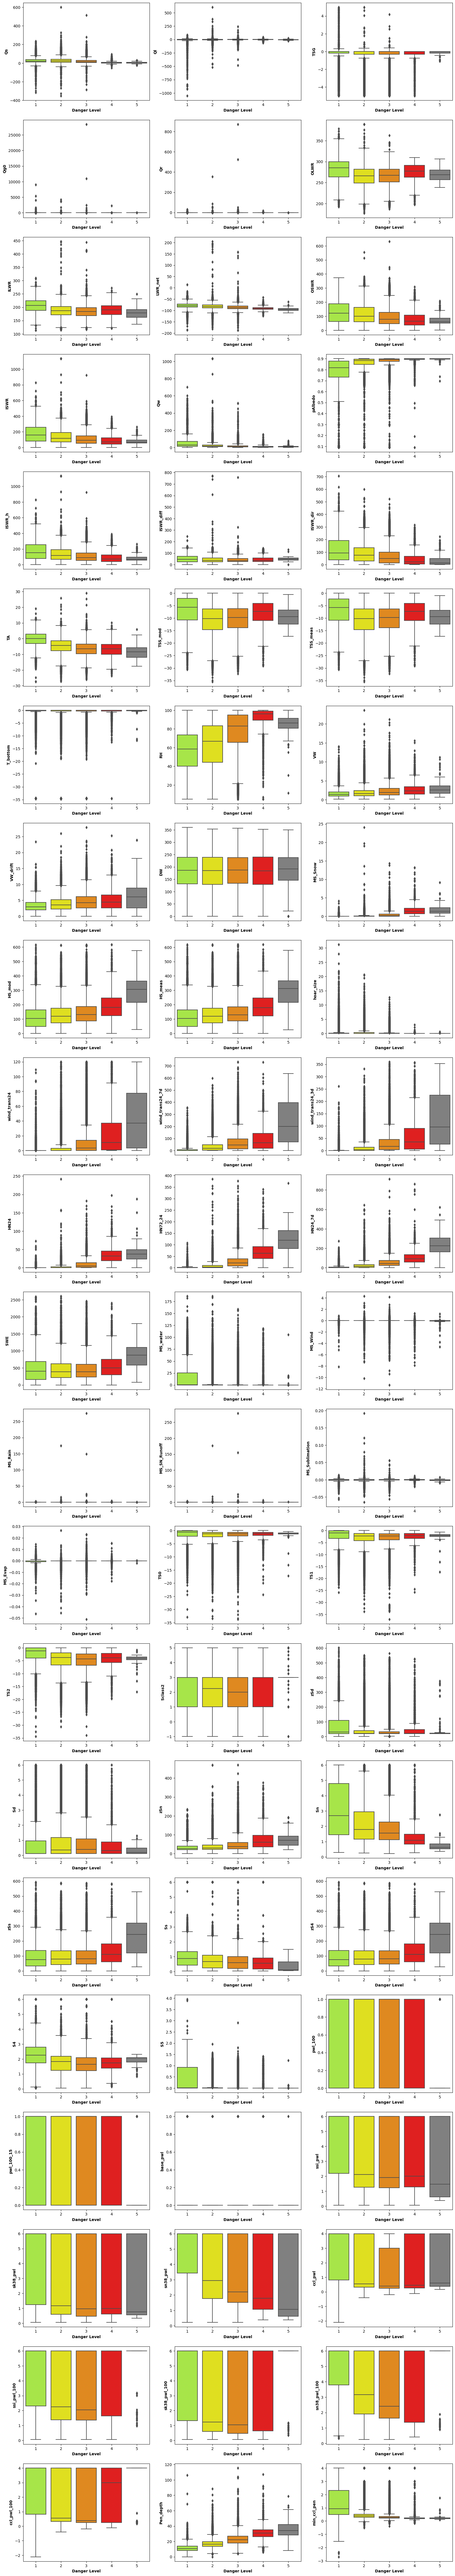

In [99]:
fig, axes = plt.subplots(nrows = 22, ncols = 3, figsize = (20, 120))
axes = axes.flatten()

for idx, col in enumerate(data.iloc[:,7:].columns.to_list()):
        ax = axes[idx]
        sns.boxplot(y = data[col],
                    x = data["dangerLevel"],
                    ax = ax,
                    palette = ["greenyellow", "yellow", "darkorange", "red", "grey"])
    
        ax.set_xlabel("Danger Level", fontsize = 10, fontweight = "bold")
        ax.set_ylabel(col, fontsize = 10, fontweight = "bold")

Among other things, this plots confirms that `zS5` is always 0, and that `base_pwl` seems to be always equal to 0 excepting some rare case when it takes the value 1.

In [100]:
data.base_pwl.value_counts()

0.0    193844
1.0     47018
Name: base_pwl, dtype: int64

#### iii) Missing values and outliers

##### iii.i) Missing values

We have seen in the section [Quality of data](#miss_val) that several observations shared missing values in the same groups of features and that `elevation_th` had a significant amount of missing values. 

We aim here to understand a bit better if the missing values appear within the same stations, or if they are linked with `datum`. 

In [101]:
data[data.elevation_th.isna()]

,datum,station_code,sector_id,warnreg,elevation_station,dangerLevel,elevation_th,Qs,Ql,TSG,...,ssi_pwl,sk38_pwl,sn38_pwl,ccl_pwl,ssi_pwl_100,sk38_pwl_100,sn38_pwl_100,ccl_pwl_100,Pen_depth,min_ccl_pen
158331,2012-01-30,PAR2,5122,17,2300,1,NaN,29.561375,4.644000,0.0,...,0.90,0.90,1.55,0.46,0.90,0.90,1.55,0.46,23.936644,0.36
158349,2012-01-30,KLO2,5111,17,2100,1,NaN,17.901125,4.100375,0.0,...,3.39,1.59,2.11,0.61,3.39,1.59,2.11,0.61,16.115351,0.37
158354,2012-01-30,KLO3,5112,17,2300,1,NaN,9.330250,0.853250,-0.2,...,2.03,1.03,1.31,0.58,2.03,1.03,1.31,0.58,18.668675,0.50
158367,2012-01-30,DAV3,5123,17,2500,1,NaN,21.884000,4.319250,0.0,...,2.16,1.10,1.83,0.25,2.16,1.10,1.83,0.25,20.564281,0.25
158368,2012-01-30,DAV4,5123,17,2300,1,NaN,16.912625,4.451250,0.0,...,1.66,0.66,2.00,0.45,1.66,0.66,2.00,0.45,16.898281,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243263,2017-04-24,ANV3,4124,19,2600,1,NaN,12.666875,-9.229500,0.0,...,6.00,6.00,6.00,4.00,6.00,6.00,6.00,4.00,9.228287,0.73
243265,2017-04-24,ILI2,1312,19,2000,1,NaN,35.029375,8.274000,0.0,...,6.00,6.00,6.00,4.00,6.00,6.00,6.00,4.00,6.289618,3.00
243266,2017-04-24,GUG2,4221,19,2800,1,NaN,6.654000,-13.078500,0.0,...,1.26,1.16,1.28,1.49,1.26,1.16,1.28,1.49,7.421111,1.49
243267,2017-04-24,SAA2,4221,19,2500,1,NaN,8.555625,1.004250,-0.1,...,6.00,6.00,6.00,4.00,6.00,6.00,6.00,4.00,6.478591,3.00


It seems at first sight that `dangerLevel` is generally equal to 1 when `elevation_th` is missing. 

In [102]:
data.loc[data.elevation_th.isna(), "dangerLevel"].value_counts()

1    21668
3      406
2      335
4      116
Name: dangerLevel, dtype: int64

Indeed, when `elevation_th` is missing then most of the times `dangerLevel` equals to 1, so when the avalanche conditions are stable or favorable. 

Let's check now the remaining missing values. We recall that we had three groups of features that seemed to share the same missing values:

- `TS0`, `TS1`, `TS2`

- `Sd`, `Sn`, `Ss`, `S4`

- the profile variables


In [103]:
# Store them into groups
group1 = ["TS0", "TS1", "TS2"]
group2 = ["Sd", "Sn", "Ss", "S4"]
group3 = meta_data.loc[meta_data["Type"]=="Profile", "Feature name"].to_list()

Let's recall what information they hold.

In [104]:
meta_data[meta_data["Feature name"].isin(group1)]

,Feature description,Feature name,Type
40,Snow temperature at 0.25 m [∘C],TS0,Measured
41,Snow temperature at 0.5 m [∘C],TS1,Measured
42,Snow temperature at 1 m [∘C],TS2,Measured


In [105]:
meta_data[meta_data["Feature name"].isin(group2)]

,Feature description,Feature name,Type
44,Deformation rate stability index [–],Sd,Modelled
46,Natural stability index [–],Sn,Modelled
48,Sk38 skier stability index [–],Ss,Modelled
50,Structural stability index [–],S4,Modelled


In [106]:
meta_data[meta_data["Feature name"].isin(group3)]

,Feature description,Feature name,Type
54,Persistent weak layer(s) in the 100 cm from the surface [–],pwl_100,Profile
55,Persistent weak layer(s) at depths between 15 and 100 cm [-],pwl_100_15,Profile
56,Persistent weak layer at bottom [–],base_pwl,Profile
57,Structural stability index at weak layer [–],ssi_pwl,Profile
58,Structural stability index at surface weak layer [–],ssi_pwl_100,Profile
59,Sk38 skier stability index at weak layer [–],sk38_pwl,Profile
60,Sk38 skier stability index at surface weak layer [–],sk38_pwl_100,Profile
61,Natural stability index at weak layer [–],sn38_pwl,Profile
62,Natural stability index at surface weak layer [–],sn38_pwl_100,Profile
63,Critical cut length at weak layer [m],ccl_pwl,Profile


Let's see what are the percent missing values in each feature in each group, and how many times the number of missing values match along all the features in each group. 

In [107]:
#Percent of missing values for the features in group 1
data[group1].isna().sum(axis=0)/data.shape[0] * 100

TS0     8.524232
TS1     9.638313
TS2    10.139690
dtype: float64

In [108]:
# Counts the  the number per now of NaN values and then count the values
data[group1].isna().sum(axis=1).value_counts()


0    218800
3     20384
2      2855
1      2288
dtype: int64

So we can see that generally if an observation is missing a value in one of these features, then all its values in `TS0`, `TS1`, `TS2` is missing. We want to retrieve the index of the rows that have missing values in all these features. 

We do the same for `group2` and `group3`.

In [109]:
data[group2].isna().sum(axis=0)/data.shape[0] * 100

Sd    5.518833
Sn    5.518833
Ss    5.028916
S4    5.028916
dtype: float64

In [110]:
# Counts the per now the number of NaN values and then count the values
data[group2].isna().sum(axis=1).value_counts()

0    226276
2     10331
4      7720
dtype: int64

In group 2, we see that `Sd` with `Sn` and `Ss` and `S4` share the exact same amount of missing values.  

In [111]:
#Percent of missing values for the features in group 1
data[group3].isna().sum(axis=0)/data.shape[0] * 100

pwl_100         1.418181
pwl_100_15      1.418181
base_pwl        1.418181
ssi_pwl         1.418181
ssi_pwl_100     1.418181
sk38_pwl        1.418181
sk38_pwl_100    1.418181
sn38_pwl        1.418181
sn38_pwl_100    1.418181
ccl_pwl         1.430051
ccl_pwl_100     1.430051
min_ccl_pen     1.685037
Pen_depth       1.786131
dtype: float64

In [112]:
# Counts the per now the number of NaN values and then count the values
data[group3].isna().sum(axis=1).value_counts()

0     238735
13      3177
1       2098
11       288
3         29
dtype: int64

Same here with group 3: the 9 first features share the same amount of missing values and also `ccl_pwl` with `ccl_pwl_100`. 

Let's see now if we have an interesting pattern with the stations. We first retrieve for each group the indices of the observations where all values in the features in the corresponding group are missing. 

In [113]:
# Retrieving the indices where TS0, TS1, TS2 are missing
T_na = data[group1].isna()
mask = (T_na["TS0"] == True) & (T_na["TS1"] == True) & (T_na["TS2"] == True)
T_na["All Same"] = mask
T_na_idx = T_na[T_na["All Same"]==True].index

#Same with Ss, Sd, Sn, S4
S_na = data[group2].isna()
mask = (S_na["Ss"] == True) & (S_na["Sd"] == True) & (S_na["Sn"] == True) & (S_na["S4"] == True)
S_na["All Same"] = mask
S_na_idx = S_na[S_na["All Same"]==True].index

# Same with group 3
P_na = data[group3].isna()
mask = P_na[group3].all(axis=1)
P_na["All Same"] = mask
P_na_idx = P_na[P_na["All Same"]==True].index

We provide now the number of time each stations recorded `NaN` for every features of each group.

In [114]:
data.loc[T_na_idx, "station_code"].value_counts().head(10)

FOU2    2489
BOR2    2419
DAV4    1913
DAV5    1639
FRA3    1570
SIM2    1567
ROT2    1558
RNZ2    1185
ROA4     803
PAR2     777
Name: station_code, dtype: int64

In [115]:
data.loc[S_na_idx, "station_code"].value_counts().head(10)

SAA3    479
SPN2    394
SAA2    308
DAV5    246
LHO2    192
FRA3    183
LUM2    174
PUZ2    156
ANV3    156
ARO3    144
Name: station_code, dtype: int64

In [116]:
data.loc[P_na_idx, "station_code"].value_counts().head(10)

ROT2    1558
LAG3     179
ROA4     152
SLF2     144
BER2     114
MTR2      84
YBR2      78
LUM2      66
VIN2      60
AMD2      45
Name: station_code, dtype: int64

We don't see anything particular, except for the last table. We notice that the station `ROT2` has the values in the features of Group 3 missing around 4 times more compared to the other stations. And this station is also represented in the table related to group 1. 

We do the same but now with the dates.

In [117]:
data.loc[T_na_idx, "datum"].value_counts().head(10)

2017-01-01    27
2016-12-31    27
2016-12-30    27
2016-12-09    26
2016-12-17    26
2016-12-16    26
2016-12-15    26
2016-12-29    25
2016-12-28    25
2016-12-18    25
Name: datum, dtype: int64

In [118]:
data.loc[S_na_idx, "datum"].value_counts().head(10)

2016-12-18    42
2012-11-01    40
2003-10-31    37
2016-12-16    37
2016-12-17    37
2016-12-15    36
2017-01-02    35
2016-12-09    35
2016-12-24    35
2016-12-12    34
Name: datum, dtype: int64

In [119]:
data.loc[P_na_idx, "datum"].value_counts().head(10)

2017-01-01    13
2011-04-28    12
2015-12-30    12
2015-12-29    12
2011-05-01    12
2015-12-28    12
2016-12-31    12
2011-04-29    11
2011-04-27    11
2017-01-02    11
Name: datum, dtype: int64

We don't see anything in particular. What we can do now is to count the missing values in each station and in each date. 

In [120]:
# Count the number of missing values per station accross all features
group_station = data.drop('station_code', axis=1).isna().groupby(data.station_code, sort=False).sum().reset_index()
group_station.set_index("station_code", inplace=True)
group_station

,datum,sector_id,warnreg,elevation_station,dangerLevel,elevation_th,Qs,Ql,TSG,Qg0,...,ssi_pwl,sk38_pwl,sn38_pwl,ccl_pwl,ssi_pwl_100,sk38_pwl_100,sn38_pwl_100,ccl_pwl_100,Pen_depth,min_ccl_pen
station_code,,,,,,,,,,,,,,,,,,,,,
KES2,0,0,0,0,0,183,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
SIM2,0,0,0,0,0,171,0,0,41,33,...,35,35,35,35,35,35,35,35,52,55
DTR2,0,0,0,0,0,170,0,0,0,39,...,39,39,39,39,39,39,39,39,46,42
MEI2,0,0,0,0,0,176,0,0,0,0,...,132,132,132,132,132,132,132,132,0,0
SPN2,0,0,0,0,0,143,0,0,707,2,...,5,5,5,5,5,5,5,5,39,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MTR2,0,0,0,0,0,195,0,0,21,83,...,84,84,84,84,84,84,84,84,85,85
DIA2,0,0,0,0,0,198,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NEN3,0,0,0,0,0,166,0,0,0,9,...,11,11,11,11,11,11,11,11,11,11


In [121]:
# Count the number and percentage of missing values per stations
# We also add the number of data collected by the station and the number of observation
nb_na_stations = pd.DataFrame(group_station.sum(axis=1),
                              columns=["Missing values"]).sort_index()

nb_na_stations["Number of data"] = data.groupby("station_code").count()["datum"] * data.shape[1]
nb_na_stations["Number of observations"] = data.groupby("station_code").count()["datum"]
nb_na_stations["Percent NaN values"] = round(nb_na_stations["Missing values"]/ nb_na_stations["Number of data"] * 100, 2)
nb_na_stations["Percent NaN values overall"] = round(nb_na_stations["Missing values"] / data.isna().sum().sum() * 100, 2)
nb_na_stations.head(7)

,Missing values,Number of data,Number of observations,Percent NaN values,Percent NaN values overall
station_code,,,,,
ALI2,982,50005,685,1.96,0.49
AMD2,1268,60955,835,2.08,0.64
ANV2,382,226519,3103,0.17,0.19
ANV3,1651,235060,3220,0.70,0.83
ARO2,322,215131,2947,0.15,0.16
ARO3,1038,222066,3042,0.47,0.52
ATT2,237,70299,963,0.34,0.12


Now let's see where are the majority of missing values.

In [122]:
nb_na_stations.sort_values(by = "Percent NaN values", ascending = False).head(7)

,Missing values,Number of data,Number of observations,Percent NaN values,Percent NaN values overall
station_code,,,,,
ROT2,25101,113734,1558,22.07,12.65
SLF2,3372,26645,365,12.66,1.70
ROA4,5425,58619,803,9.25,2.73
MTR2,1848,20221,277,9.14,0.93
CAM3,1803,26791,367,6.73,0.91
DAV5,7057,119647,1639,5.90,3.56
FRA3,6698,114610,1570,5.84,3.37


We can see again that `ROT2` appears again in our table. This station has 25101 missing values representing 21% of its data and 12.65% of all the missing in the dataset..

Let's do the same with dates. 

In [123]:
group_dates = data.drop('datum', axis=1).isna().groupby(data.datum, sort=False).sum().reset_index()
group_dates.set_index("datum", inplace=True)

In [124]:
nb_na_dates = pd.DataFrame(group_dates.sum(axis=1),
                              columns=["Missing values"]).sort_values(by="Missing values",
                                                                     ascending = False)
nb_na_dates.head(7)

,Missing values
datum,
2017-01-01,578
2016-12-31,560
2016-12-17,551
2017-01-02,546
2012-11-01,541
2016-12-16,537
2016-12-15,536


Here we don't see anything particular here.

##### iii.ii) Outliers

Thanks to the box plots we have provided [before](#boxplot), we can primarly see some outliers: 

- `Qg0` greater or equal to 5000
- `Qr` greater or equal to 200
- `ISWR_diff` greater than 500
- `MS_Rain` greater than 100
- `MS_SN_Runoff` greater than 150

### (b) How does the EDA inform your project plan?

* We have seen that the variables follow several types of distributions. Some are normal, others truncated normal, some are highly skewed to the right or left, and others are discrete. The histograms do not clearly allow us, for now, to determine whether a variable’s distribution belongs to the skewed category or the discrete category. This poses a problem when trying to remove outliers. We will therefore need to focus more specifically on these variables to better understand their distributions, for example by changing the scale of the histograms or by counting the number of distinct values these variables take. In a second time, we will remove outliers using either the z-scores or the z-scores method applied to the log transformation of the features, z-scores applied only to left or right hand-side of the distribution, manual removals or the interquantile range.  

* We have observed that our dataset contains clusters of variables that are highly correlated with each other. It would be better to select one (or at most two if the cluster is large) variable(s) that provide(s) a good compromise between: having the highest correlation coefficients with the other features in the cluster, and having a high correlation coefficient with `dangerLevel`.

* We understand relatively well what most of the variables represent, such as `TA`, which is the average daily recorded temperature. But for others, like `MS_SN_Runoff`, which represents `Virtual lysimeter [kg s−2 h−1]`, we do not understand what it actually measures or its unit. This clearly affects our ability to detect outliers. For the features we do not fully understand, we could first classify them by unit of measurement or by type of measured object (such as air, temperature, wind), and then investigate the units more thoroughly.

* `elevation_th` takes the values 0 or `NaN`. To ensure our models interpret this variable correctly, we plan to replace the 0 or `NaN` values with 1000.

* The station `ROT2` has the largest proportion of missing values. We plan to remove it.

* There are temporal gaps in our dataset. Some of these gaps are indeed due to the summer season, during which avalanche danger is not published and snow-related features are not measured. However, most of the time these temporal gaps are not due to this. In practice, there is a temporal dimension in avalanche risk assessment (e.g., what the danger level was in previous days, how much snow has fallen recently, how stable the deeper and older snow layers are). However, this will not be a major issue for three reasons: first, because we are working only on daily variables not weekly or yearly, then because `dangerLevel` depends much more on same-day encoded values. Finally, because our dataset already contains variables capturing this temporal dimension, such as `HN24_7d` (which encodes the 7-day sum of daily new snow height \[cm]) and other variables related to snowpack stability indices. 

* There are groups of features with missing values at the same indices. We can either remove these variables entirely or simply drop the rows with missing values.

### (c) What further EDA do you plan for the project?

- Access the skewness of the distribution of each feature. 

- For the selection of features within each cluster, study the one that has the strongest relationship with the other features in the cluster, and analyze the correlation between the features of the cluster variables and the target variable. Make a choice by selecting the variable that provides the best trade-off between these two criteria.

- It seems that there are groups of features that come together, such as `zSs` and `Ss`. Since we removed `zS5`, we should consider whether we also need to remove `S5` for example. We want to study more precisely the relationships between these pairs of features.

- Check in the time holes can be also explained by low or medium altitude stations.

- Go a bit further in understanding the groups of missing values which are consistent.



## 4) Machine learning 

### (a) Phrase your project goal as a clear machine learning question

We aim to train models that will be able to predict the target variable `dangerLevel`. As the values in `dangerLevel` are 1, 2, 3, 4, 5, this is a classification task. 

The choice of using each feature will depend at each step on the model we will be training. But we will start in any case with all the features that are stored in `data` in its current state (meaning without the features we have already removed) and also add two features from the meta data of the stations `meta_data`: the latitude `lat` and the longitude `lon` coordinates of the SLF stations. 

Also, our plan is to use most of the time the results from a Principal Component Analysis. 

We will also remove features according to three analysis:

- As we said we will select one or two features from each of the high-correlated clusters. Our selection will depend on the results on the analysis of the compromise of selecting a feature which has a high correlation coefficient with each feature of the cluster and selecting the feature that has the strongest correlation coefficient with `dangerLevel`.

- Remove the features that have extremely low correlation coefficients with `dangerLevel`

- Using boxplots, remove the features that show no particular behaviour against `dangerLevel`

### (b) What models are you planning to use and why?

As we said this project will be a classification task. Our idea is to train various models seen in course that we intuitively find appropriate given the core of our data. We want to train multiple models because:

- We are curious to observe how each model behaves compared to the others on this same task. Also because in [[13]](#ref13) the authors reached an accuracy of around 75% with both Random Forest Classifiers, so it will be really satisfying if we can (come on, let's dream a little !) improve the performance by training other models. 

- We are curious to observe the behaviours of as many acceptable models as possible on a classification task that is not related to image classification.

- We want to assess our intuitions of "which model will perform better than others. 

- We want to strengthen or enrich our machine learning models implementation skills.

**Decision Tree - PRIORITY**

Decision Tree models work well on data that have a *"tree structure"* and find the most efficient way of defining certain threshold values for certain characteristics to separate the data

We know that for example the more snow has fallen or the stronger the wind was during the last days, the weaker the old layers  are in the snowpack, the higher is `dangerLevel`. We can also imagine that the researchers within the SLF have some set of criteria of type, for instance, "if it has snowed at least 60 cm in the last 24 hours, then the danger level is automatically at least 2". 

As our dataset stores values related to features related to snowfall, wind velocity or stability index of layers, a Decision Tree classifier seems to be an adequate classification model for this task and we expect that it will perform well compared to other models. 

**Random Forest - PRIORITY**

We choose to train a Random Forest classifier for the same reasons as the Decision Tree, as its architecture is based on the latter. However, the Random Forest allows us to control the risk of overfitting associated with Decision Trees.
 
**Logistic Regression - PRIORITY**

Logistic Regression is the equivalent of linear regression in a classification task, it transforms the result of linear regressions into probabilities. In our case, as it is a multiclass classification, we will use both one-vs.-rest strategy and softmax regression. 

**Neural Network - PRIORITY**

We have seen in the course that neural networks are high-performance models. As we are working on a big feature space, it seems appropriate to train a neural network which we know can succeed in more complex tasks than the other classical models.

**Clustering with K-Means algorithm - OPTIONAL**

The K-Means algorithm aims to find $k$ groups of similar data. As we are working on a 70 dimensions space, generated by meteorological and profile features, it seems reasonable to think that in this space our data should be separable. We can either use brutally the 70 features or: 

- working on a selection of at most around 10 features, associating a mix between highly correlated features with `dangerLevel`, features that intuitively seem to be appropriate to use (for example wind strength, air, temperature, snowfall quantity, or number of weak layers) and the station coordinates.

- implementing a Principal Component Analysis on the entire data set (or again a selection of features) before using the K-Means algorithm.

**Support Vector Machine - OPTIONAL**

We will train both linear SVM and SVM with RBF Kernel. SVM models aim to find the best way to separate the data. For us, it is a bit difficult to anticipate if our data of around 70 features might be separable but we would like to test the performance of these models. We expect the SVM with RBF kernel to perform better than the linear one but we expect that the performance of each model against the other will depend on the set of features we will use.

**A classifier we didn't see in the course: Gradient-Boosted Tree - NICE TO ADD**

As we want to enrich our analysis and skills, we plan to use a different classifier than the ones covered in the course. Our choice fell on the Gradient-boosted Tree. This model seems to be a really good option according to performance and it seems to improve the performance of the Random Forest models. As we said, our intuition tells us that Random Forest and Decision Trees might be the most performant candidate between all models, according to what we know about our data. Also, as we said the authors in [[13]](#ref13) trained Random Forest Classifiers, so the Gradient-boosted Tree could be a good candidate to beat the performance of the model, who knows ?

### (c) Please tell us your detailed machine learning strategy 

Here is our detailed strategy for each model.

#### i) Plan for each model

We have already split the data into a train and test sets from the 1st of October 2017. Before training any models, we plan to split again the train set into a train and validation set from a certain date so that we roughly get a ~82.5-17.5 split between the train and valid set so that overall we will get a ~70-15-15 split in train, validation and test sets. Finally, for each set, we will separate the features from the target variable. So we will have `X_train`, `X_valid`, `X_test` the matrix containing the features, and `y_train`, `y_valid`, `y_test` the vectors containing the target labels. 

Why this choice rather than just randomly splitting the data ? Doing so will enable us to assess a concrete issue: is it possible to predict the future avalanche danger level, and more generally will it be possible to build an avalanche forecast, only using the data collected by the SLF ?

Before training any model and after ending the Exploratory Data Analysis and Feature Engineering part, we plan to apply a Principal Component Analysis. Indeed, we will be dealing with a high-dimensional space, even after feature selection. We have seen that a PCA can among other things reduce the dimensionality of our problem, reduce the risk of overfitting and speed up model training. 

We plan, for <u>every model</u>, we will consider whether or not to use the features provided by the PCA and the number of components of the PCA as hyperparameters of this model and will finetune them with a GridSearchCV.

We now explain, for each model, the preprocessing steps we plan to apply and the hyperparameters that will require finetuning. We will not explicitly discuss tuning the number of PCA components or deciding whether to apply PCA, as this is assumed to be part of the process. 


**Decision Tree**

- Data standardization (both `X_train` and `X_test`)
- Depth parameter finetuning

**Random Forest**

- Data standardization
- Number of estimators and the depth parameter finetuning

**Logistic Regression**

- Data standardization
- $L_2$ regularization penalty term finetuning
- Choosing the optimal setting of a strategy with a solver between the pairs `ovr` (One vs. Rest), `liblinear` and `multinomial` (softmax regression), `saga` 

**Neural Network**

- Data standardization
- We plan to implement some basic neural networks (1 or 2 layers). We might like to find a way of  finetuning the numbers of nodes and layers, but intuitively it seems that it could be a really expensive strategy in terms of ressources. 

**Clustering with K-Means algorithm**

- Apply a K-Means algorithm only using the features without the target labels (as this is an unsupervised model)

**Support Vector Machine**

- Consider choosing either a linear or one with a RBF Kernel as an hyperparameter
- Regularization strength parameter tuning

**Gradient-Boosted Tree**

- Data standardization
- It seems that there are a lot of different parameters and hyperparameters to take account with this one. We will try to understand in a first part which ones are the most important ones for us (such as `log_loss` for the loss function, `max_depth`, `n_estimators`, `learning_rate`)

#### ii) Methodologies used to train and finetune the models


To encapsulate the standardization step, the different parameters and hyperparameters settings, we plan to use the `Pipeline` and plan to finetune the hyperparameters of every model using a Grid Search with Cross Validation.

We will always display training and validation curves and check if we see at one point an increasing gap  between the training and validation accuracies to see if there are any signs of overfitting. We will do so to choose the right set of parameter ensuring a good compromise between performance and avoiding risk of overfitting. 

For the Neural Network, we will train it by using several batches and by passing the data through training for several epochs. 

#### iii) The baseline model

As this project is a classification task, we plan to implement a `DummyClassifier` with the "most frequent" strategy to establish our baseline model. According to the distribution of the danger level that we showed [previously](#frequenty), this model will systematically assign the most frequent value, which is the danger level 2, and we expect this model to get an accuracy of around 40%.

#### iv) Metrics and methodologies

All along this project we will track the following metrics:
    
* accuracy

This will be the most important metric among the others. The proportion of good predictions against the total predictions given by the formula:

$$\text{accuracy} = \frac{\text{correct predictions}}{\text{total predictions}}$$

* precision

Given a certain category, it is the proportion of the number of times that model correctly predicted this category, against *the number of times the model predicted this category*. This metric is given by:

$$\text{precision} = \frac{\text{true positive}}{\text{true positive}+\text{false positive}}$$

* recall

Given a certain category, it is the proportion of the number of times the model correctly predicted the given category, against *the total number of elements in this category*. 

$$\text{recall} = \frac{\text{true positive}}{\text{true positive}+\text{false negative}}$$

* f-1 score:

The f-1 score is a combination of the two metrics above, given by:

$$\text{f1-score}= 2\cdot\frac{\text{recall}\cdot\text{precision}}{\text{recall}^{-1}+\text{precision}^{-1}}$$

We will evaluate the performance of each model by showing a confusion matrix and a classification report. At the end of the project, we will compare the accuracies of all models using a bar plot.

## 5) Bibliography

<a id="ref1"></a> [1] [SLF - Interpretation Guide (PDF)](https://www.slf.ch/fileadmin/user_upload/SLF/Lawinenbulletin_Schneesituation/Wissen_zum_Lawinenbulletin/Interpretationshilfe/Interpretationshilfe_EN.pdf), p. 13.
  
<a id="ref2"></a>[2] [SLF - Interpretation Guide (PDF)](https://www.slf.ch/fileadmin/user_upload/SLF/Lawinenbulletin_Schneesituation/Wissen_zum_Lawinenbulletin/Interpretationshilfe/Interpretationshilfe_EN.pdf), p. 5.

<a id="ref3"></a>[3] [SLF - Interpretation Guide (PDF)](https://www.slf.ch/fileadmin/user_upload/SLF/Lawinenbulletin_Schneesituation/Wissen_zum_Lawinenbulletin/Interpretationshilfe/Interpretationshilfe_EN.pdf), p. 27-32.

<a id="ref4"></a>[4] [SLF - Interpretation Guide (PDF)](https://www.slf.ch/fileadmin/user_upload/SLF/Lawinenbulletin_Schneesituation/Wissen_zum_Lawinenbulletin/Interpretationshilfe/Interpretationshilfe_EN.pdf), p. 7.

<a id="ref5"></a>[5] [SLF - Subdivision of danger levels in the avalanche bulletin](https://www.slf.ch/en/news/subdivision-of-danger-levels-in-the-avalanche-bulletin/)

<a id="ref6"></a>[6] [SLF - Interpretation Guide (PDF)](https://www.slf.ch/fileadmin/user_upload/SLF/Lawinenbulletin_Schneesituation/Wissen_zum_Lawinenbulletin/Interpretationshilfe/Interpretationshilfe_EN.pdf), p. 18.

<a id="ref7"></a>[7] [SLF - Interpretation Guide (PDF)](https://www.slf.ch/fileadmin/user_upload/SLF/Lawinenbulletin_Schneesituation/Wissen_zum_Lawinenbulletin/Interpretationshilfe/Interpretationshilfe_EN.pdf), p. 14-16.

<a id="ref8"></a>[8] [SLF - Information about snow profiles](https://www.slf.ch/en/avalanche-bulletin-and-snow-situation/snow-maps/information-about-snow-profiles/)

<a id="ref9"></a>[9] [SLF- Avalanche Forecast, 2025-03-15, 5 pm](https://www.slf.ch/fileadmin/avalanche_bulletin/pdf/2025/03/Bulletin_2025-03-15_17-00_en.pdf?time=1751982262)

<a id="ref10"></a>[10] [SLF - Interpretation Guide (PDF)](https://www.slf.ch/fileadmin/user_upload/SLF/Lawinenbulletin_Schneesituation/Wissen_zum_Lawinenbulletin/Interpretationshilfe/Interpretationshilfe_EN.pdf), p. 32.

<a id="ref11"></a>[11] Pérez-Guillén, C., Techel, F., Hendrick, M., Volpi, M., van Herwijnen, A., Olevski, T., Obozinski, G., Pérez-Cruz, F., Schweizer, J. (2022). Weather, snowpack and danger ratings data for automated avalanche danger level predictions.  EnviDat.  https://www.doi.org/10.16904/envidat.330.

<a id="ref12"></a>[12] [SLF - Description of automated stations](https://www.slf.ch/en/avalanche-bulletin-and-snow-situation/measured-values/description-of-automated-stations/)

<a id="ref13"></a>[13]  Pérez-Guillén, C., Techel, F., Hendrick, M., Volpi, M., van Herwijnen, A., Olevski, T., Obozinski, G., Pérez-Cruz, F., and Schweizer, J.: Data-driven automated predictions of the avalanche danger level for dry-snow conditions in Switzerland, Nat. Hazards Earth Syst. Sci., 22, 2031–2056, https://doi.org/10.5194/nhess-22-2031-2022, 2022.


## 6) Appendix

You can find below to webpages I consulted for this proposal:

https://www.youtube.com/watch?time_continue=8&v=r3EGMZJP6U4&embeds_referring_euri=https%3A%2F%2Fwww.google.com%2Fsearch%3Fq%3Dhow%2Bto%2Bdisplay%2Ba%2Bpng%2Bfile%2Bin%2Ba%2Bmarkdown%2Bcell%2Bjupyter%2Bnotebook%26rlz%3D1C5CHFA_enCH890CH890%26oq%3Dhow%2Bto&source_ve_path=Mjg2NjY

https://www.slf.ch/fileadmin/avalanche_bulletin/pdf/2025/03/Bulletin_2025-03-15_17-00_en.pdf?time=1751982262

https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

https://stackoverflow.com/questions/62917882/convert-datetime64ns-utc-pandas-column-to-datetime

https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features

https://stackoverflow.com/questions/43759921/pandas-rename-column-by-position

https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting